In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'pyparsing'

### Load Data

In [5]:
path = 'merged_df.csv'
df = pd.read_csv(path)

### Transformation - Units

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

Vitamin A( in mg): Amount of Vitamin A in micrograms per 100 grams, important for vision and immune functioning.

The current units for Vitamin A is different from other vitamin's, so will convert Vitamin A from ug to mg.

In [11]:
df['Vitamin A'] = df['Vitamin A'] / 1000  # µg → mg

In [13]:
df[['Vitamin A', 'Vitamin B1', 'Vitamin D']]

,Vitamin A,Vitamin B1,Vitamin D
0,0.000200,0.033,0.000
1,0.000200,0.099,0.000
2,0.000000,0.000,0.000
3,0.000075,0.019,0.000
4,0.000016,0.080,0.036
...,...,...,...
2390,0.000000,0.002,0.000
2391,0.000000,0.000,0.000
2392,0.000000,0.000,0.000
2393,0.000000,0.064,0.080


There are some features' units in g per 100g, we will convert the units to mg per 100g to stay consistent as other features

In [16]:
units_in_g =['Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Water']

In [18]:
for col in units_in_g:
    df[col] = df[col] * 1000  # g → mg

In [20]:
df

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5000.0,2900.0,1300.0,200.0,800.0,500.0,900.0,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19400.0,10900.0,4900.0,800.0,3100.0,2700.0,7800.0,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3600.0,2300.0,900.0,0.0,900.0,3400.0,800.0,100.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2000.0,1300.0,500.0,2.0,1500.0,91.0,1500.0,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2300.0,1400.0,600.0,42.0,1200.0,900.0,1200.0,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,95.0,0.0,0.0,0.0,6700.0,0.0,500.0,0.0,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,enoki mushrooms,1,99.0,27.0,0.0,10.0,200.0,34.0,62.0,89.0,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,morel mushrooms,4,70.0,56.0,31.0,7.0,700.0,96.0,400.0,400.0,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,portabella mushrooms raw,19,300.0,36.0,16.0,100.0,3300.0,2200.0,1800.0,1100.0,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [22]:
# df.to_csv('clean_data_with_same_units.csv')

#### Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
df1 = df.copy()
food_column = df1['food']  
df1 = df1.drop(columns=['food'])  

# Standardize the data
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

# Convert back to DataFrame with original column names
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)

# Add back the 'food' column
df1_scaled.insert(0, 'food', food_column)

print(df1_scaled.head())

                               food  Caloric Value       Fat  Saturated Fats  \
0                      cream cheese      -0.449163 -0.178475       -0.052565   
1                 neufchatel cheese      -0.022799  0.318028        0.357730   
2  requeijao cremoso light catupiry      -0.454362 -0.226746       -0.083337   
3                    ricotta cheese      -0.503758 -0.281913       -0.134624   
4              cream cheese low fat      -0.503758 -0.271569       -0.129495   

   Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates    Sugars  \
0             -0.219034             -0.273345      -0.605069 -0.296725   
1              0.059240             -0.189361      -0.526838 -0.131772   
2             -0.249954             -0.301340      -0.601668 -0.079287   
3             -0.280873             -0.301060      -0.581259 -0.327391   
4             -0.273143             -0.295461      -0.591463 -0.266733   

    Protein  Dietary Fiber  ...   Calcium    Copper      Iron  Magnesium  

### Hierarchical Clustering

#### Functions

In [18]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
def plot_dendrogram(data, method='ward', metric='euclidean', figsize=(15, 8)):
    """
    Plots a dendrogram for hierarchical clustering with a larger figure size.

    Parameters:
        data (pd.DataFrame or np.array): Input dataset (rows = samples, columns = features).
        method (str): Linkage method ('ward', 'single', 'complete', 'average').
        metric (str): Distance metric ('euclidean', 'manhattan', etc.).
        figsize (tuple): Figure size (width, height) for better visualization.
    """
    plt.figure(figsize=figsize)  
    linkage_matrix = sch.linkage(data, method=method, metric=metric)
    sch.dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
    plt.xlabel('Sample Index', fontsize=14)
    plt.ylabel('Distance', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [20]:
def hierarchical_clustering_with_cut(data, distance_threshold=4, method='ward', metric='euclidean'):
    """
    Perform hierarchical clustering and cut the dendrogram at a given distance.

    Parameters:
        data (pd.DataFrame or np.array): The input dataset (rows = samples, columns = features).
        distance_threshold (float): The distance at which to cut the dendrogram.
        method (str): Linkage method ('ward', 'single', 'complete', 'average').
        metric (str): Distance metric ('euclidean', 'manhattan', etc.).

    Returns:
        cluster_labels (np.array): Array of cluster labels for each food item.
    """
    # Compute linkage matrix
    linkage_matrix = sch.linkage(data, method=method, metric=metric)

    # Get cluster labels by cutting the dendrogram at 'distance_threshold'
    cluster_labels = sch.fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

    return cluster_labels

#### All-in Clustering

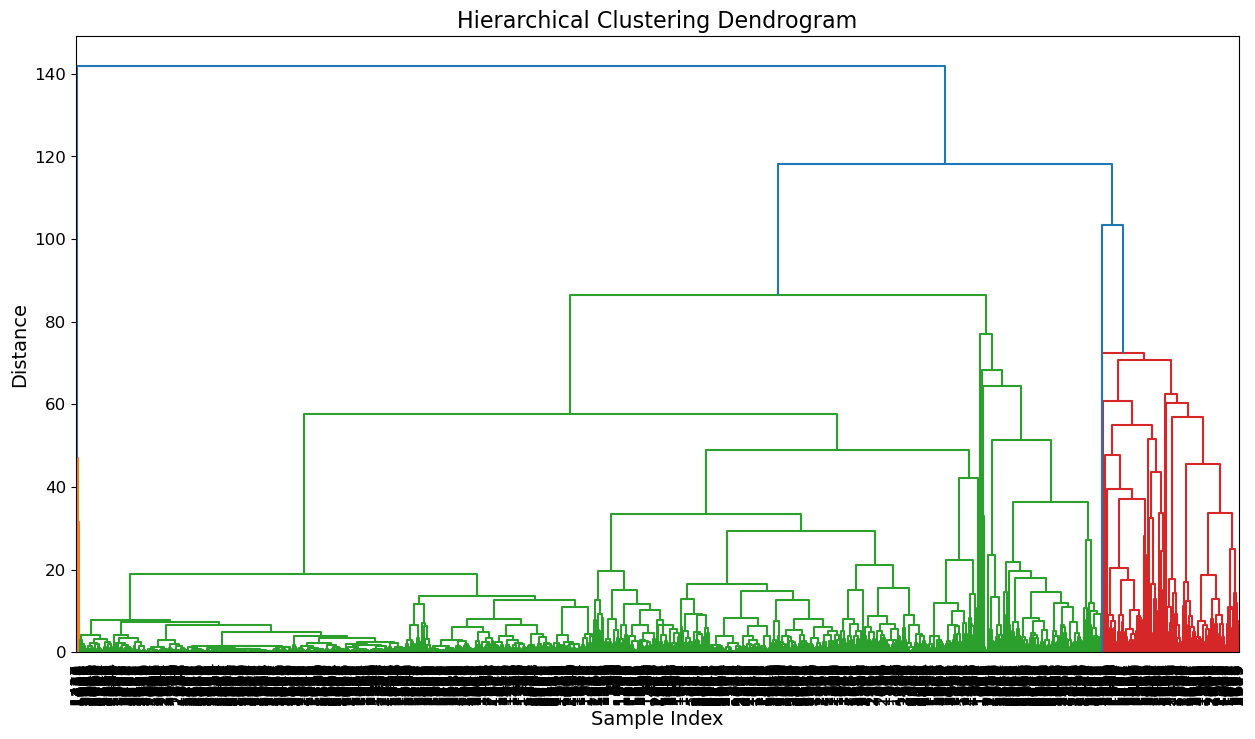

In [88]:
X1 = df1_scaled.copy()
x1 = X1.drop('food', axis = 1)
data1 = pd.DataFrame(X1, columns= x1.columns)

# Plot dendrogram
plot_dendrogram(data1)

In [98]:
data = pd.DataFrame(X1, columns=x1.columns)  
food_names = X1['food']  

# Get cluster labels
labels = hierarchical_clustering_with_cut(data, distance_threshold=58)

# Create a DataFrame to display results
clustered_foods = pd.DataFrame({'food': food_names, 'Cluster': labels})
print(clustered_foods.sort_values(by="Cluster"))

                                                 food  Cluster
1339                         pork top loin roasts raw        1
1374                              pork arm picnic raw        1
1438                            turkey breast roasted        1
1437                                   goose meat raw        1
1376                           pork arm picnic cooked        1
...                                               ...      ...
797                                        millet raw       10
1667                           muesli with fruit nuts       11
1943                                     adobo fresco       12
1543                             acerola cherry juice       13
1477  smoothie high protein creamy chocolate slimfast       14

[2395 rows x 2 columns]


In [110]:
clustered_foods['Cluster'].value_counts()

Cluster
2     1853
6      234
10     150
9      125
5       11
1        7
8        4
4        3
3        3
7        1
14       1
13       1
11       1
12       1
Name: count, dtype: int64

In [102]:
X1 = pd.merge(X1, clustered_foods, on = 'food', how = 'left')
x1 = X1.drop('food', axis = 1)

In [130]:
clustered_foods[X1['Cluster'].isin([7, 11, 12, 14, 13])]

,food,Cluster
262,english muffin mcdonalds,7
1477,smoothie high protein creamy chocolate slimfast,14
1543,acerola cherry juice,13
1667,muesli with fruit nuts,11
1943,adobo fresco,12


In [112]:
clustered_foods[X1['Cluster'].isin([5, 1, 8, 4, 3])]

,food,Cluster
570,gamay red wine,5
571,late harvest white wine,5
575,muller thurgau white wine,5
576,mouvedre red wine,5
580,petite sirah red wine,5
586,lemberger red wine,5
593,semillon white wine,5
594,dessert wine dry,5
600,claret red wine,5
602,fume blanc white wine,5


In [114]:
# Group data by clusters and calculate mean values
cluster_summary = x1.groupby('Cluster').mean()
print(cluster_summary.T)

Cluster                      1         2          3          4          5   \
Caloric Value         11.397292 -0.231964   4.733932   0.106324  -0.080230   
Fat                   10.413092 -0.174903   4.000424  -0.165832  -0.347424   
Saturated Fats         4.673149 -0.110070   2.110029  -0.124366  -0.200364   
Monounsaturated Fats  10.255997 -0.147988   3.797904  -0.288603  -0.318988   
Polyunsaturated Fats   6.489340 -0.135789   2.446793  -0.180030  -0.294977   
Carbohydrates         -0.632280 -0.150613  -0.632280   1.506043  -0.163510   
Sugars                -0.334214  0.006382  -0.334214  -0.189255  -0.296725   
Protein               12.590871 -0.188330   6.167481  -0.021704  -0.365209   
Dietary Fiber         -0.413778 -0.179006  -0.413778   5.329567   3.116015   
Cholesterol            3.581917 -0.088422   1.592020  -0.161371  -0.161371   
Sodium                 1.004045 -0.032623   0.304194  -0.196157  -0.263368   
Water                 10.110566 -0.124886   3.481042  -0.644609 

In [134]:
# Find the cluster with the highest value for each feature
highest_cluster_per_feature = cluster_summary.idxmax(axis=0)

highest_cluster_df = pd.DataFrame({'Feature': cluster_summary.columns, 'Highest Cluster': highest_cluster_per_feature.values})

print(highest_cluster_df)

                 Feature  Highest Cluster
0          Caloric Value                1
1                    Fat                1
2         Saturated Fats                1
3   Monounsaturated Fats                1
4   Polyunsaturated Fats                1
5          Carbohydrates               10
6                 Sugars               11
7                Protein                1
8          Dietary Fiber                4
9            Cholesterol                8
10                Sodium               12
11                 Water                1
12             Vitamin A                5
13            Vitamin B1               14
14           Vitamin B11               11
15           Vitamin B12               14
16            Vitamin B2               14
17            Vitamin B3                1
18            Vitamin B5                3
19            Vitamin B6                3
20             Vitamin C               13
21             Vitamin D                4
22             Vitamin E          

In [136]:
# Find Which Cluster Has the Highest Value for Each Feature (Only for Clusters with More Than 1 Element)
valid_clusters = clustered_foods['Cluster'].value_counts()
valid_clusters = valid_clusters[valid_clusters > 1].index  # Clusters with count > 1

filtered_cluster_summary = cluster_summary.loc[valid_clusters]

highest_valid_cluster_per_feature = filtered_cluster_summary.idxmax(axis=0)

highest_valid_cluster_df = pd.DataFrame({'Feature': filtered_cluster_summary.columns, 'Highest Cluster': highest_valid_cluster_per_feature.values})

# Display the results
print(highest_valid_cluster_df)

                 Feature  Highest Cluster
0          Caloric Value                1
1                    Fat                1
2         Saturated Fats                1
3   Monounsaturated Fats                1
4   Polyunsaturated Fats                1
5          Carbohydrates               10
6                 Sugars                6
7                Protein                1
8          Dietary Fiber                4
9            Cholesterol                8
10                Sodium                1
11                 Water                1
12             Vitamin A                5
13            Vitamin B1                1
14           Vitamin B11                3
15           Vitamin B12                4
16            Vitamin B2                1
17            Vitamin B3                1
18            Vitamin B5                3
19            Vitamin B6                3
20             Vitamin C                8
21             Vitamin D                4
22             Vitamin E          

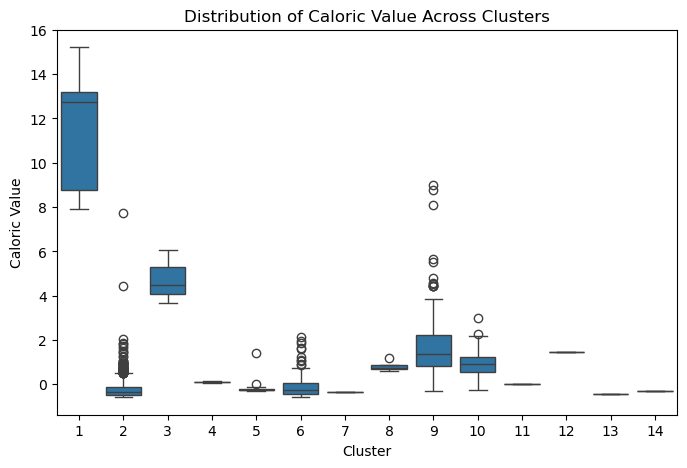

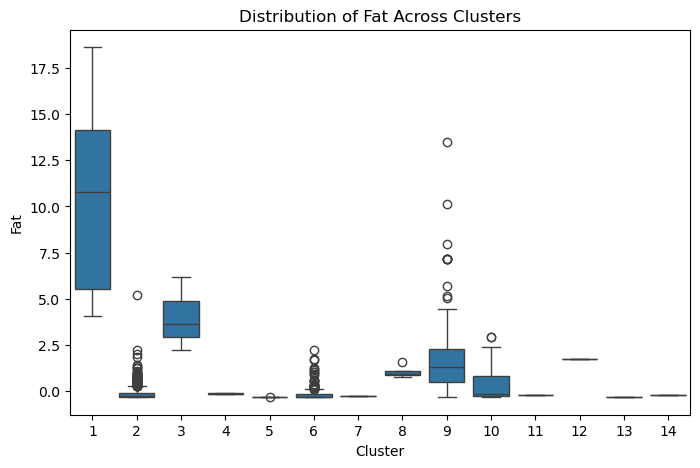

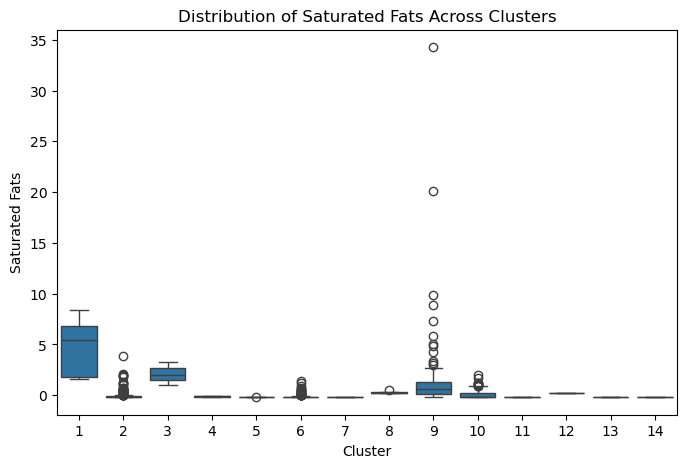

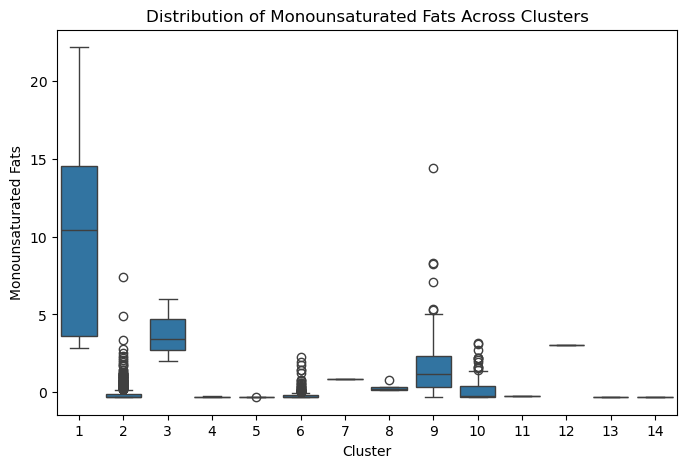

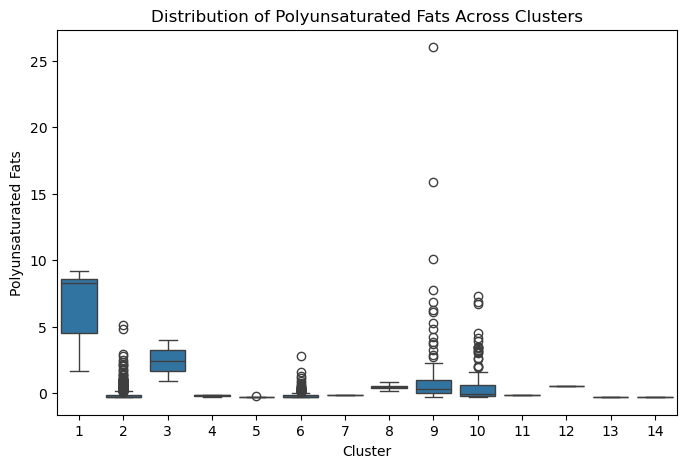

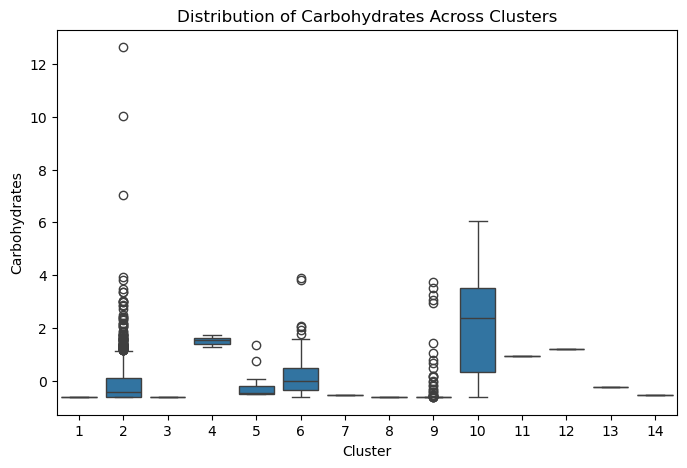

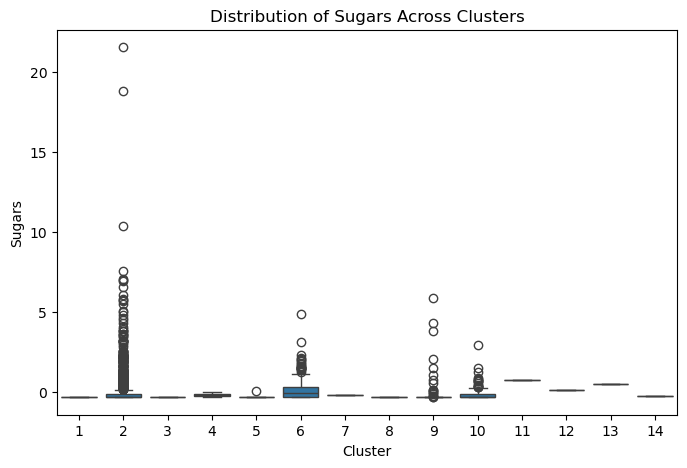

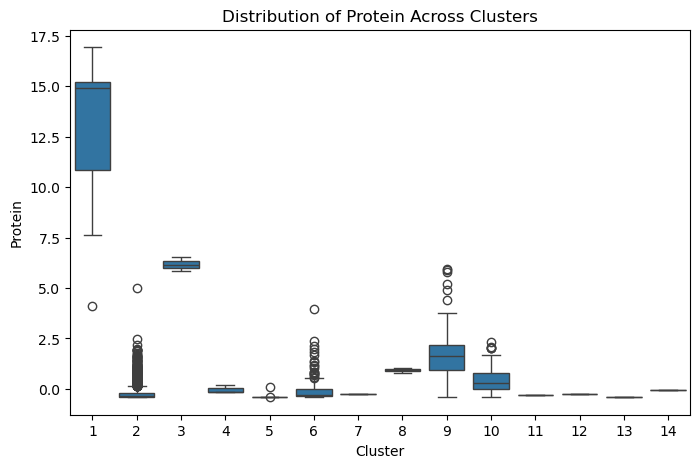

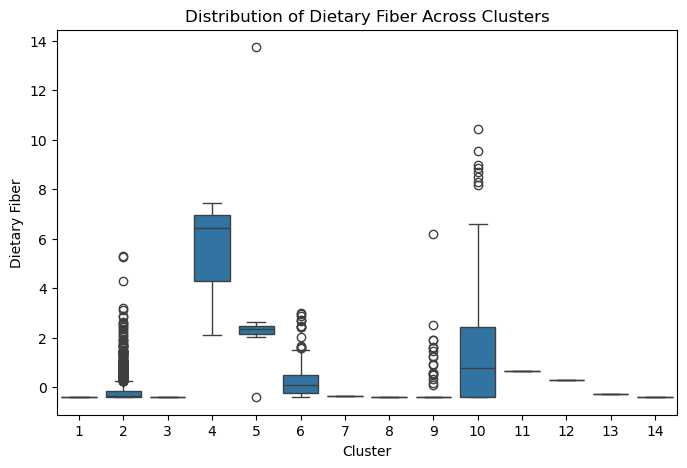

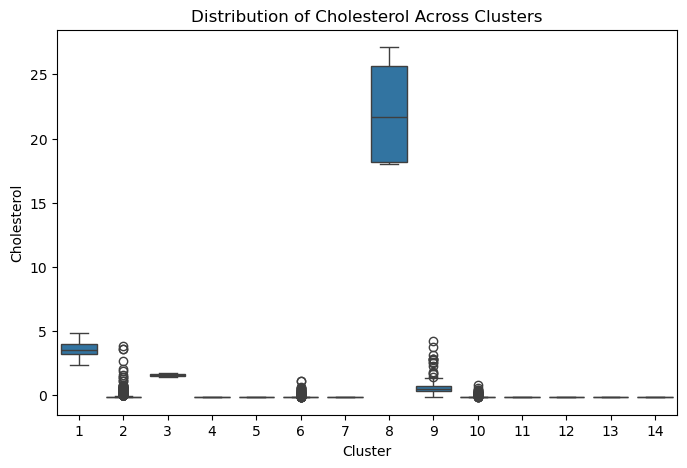

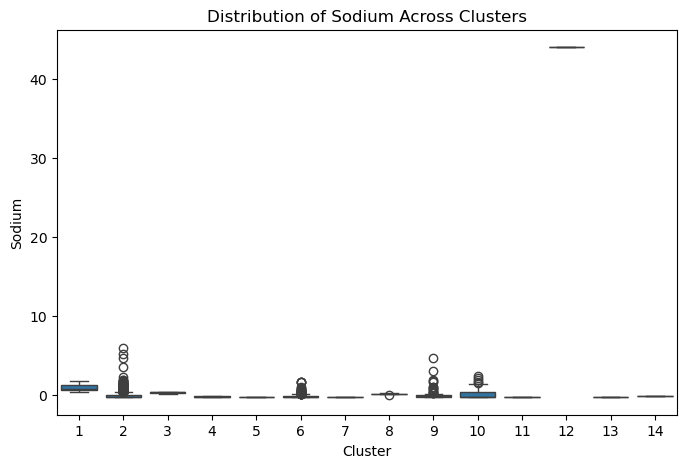

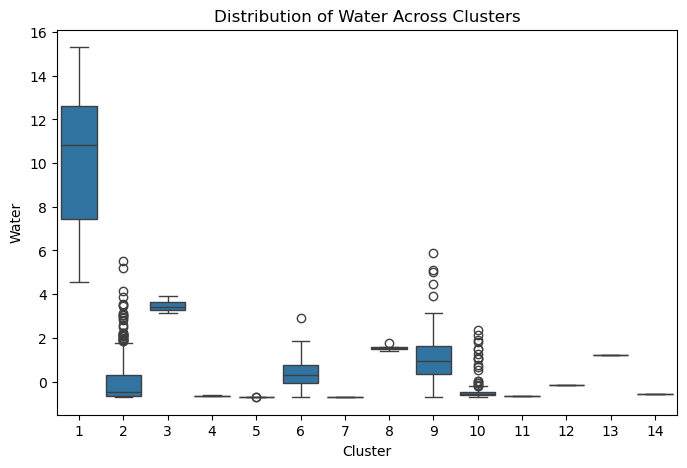

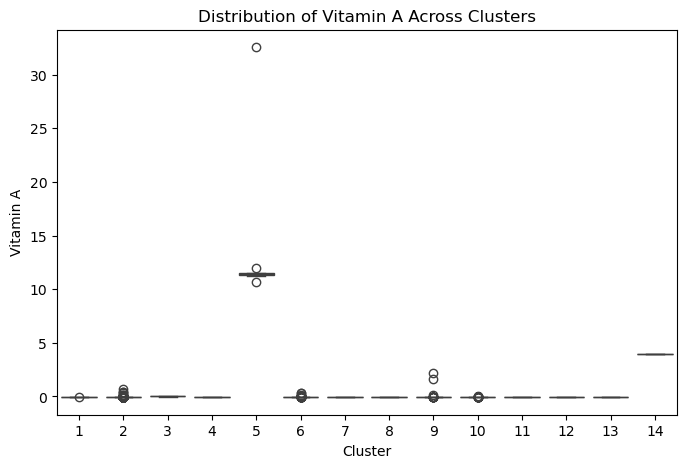

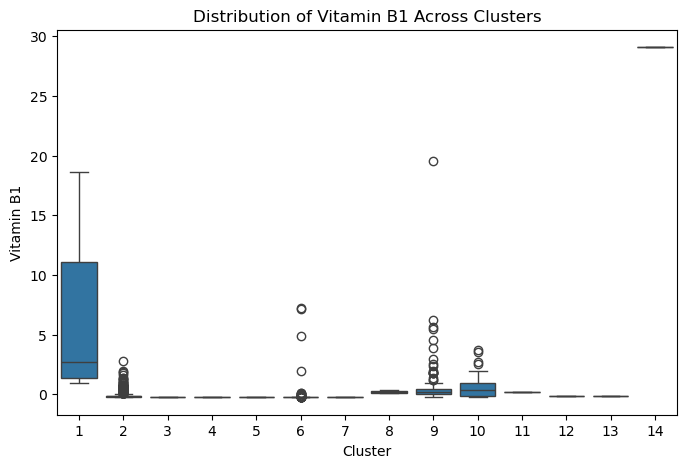

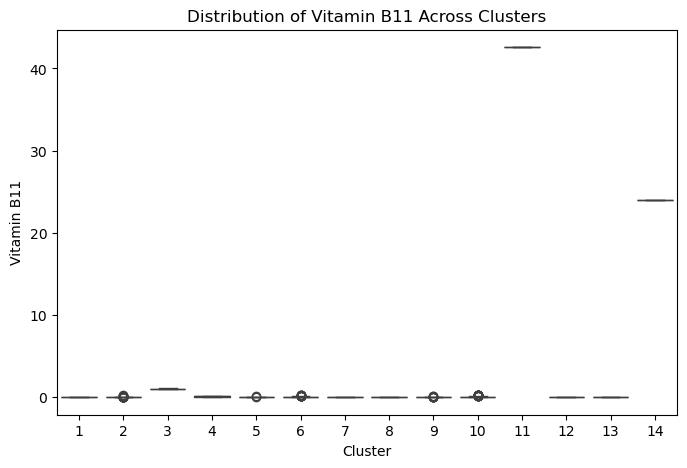

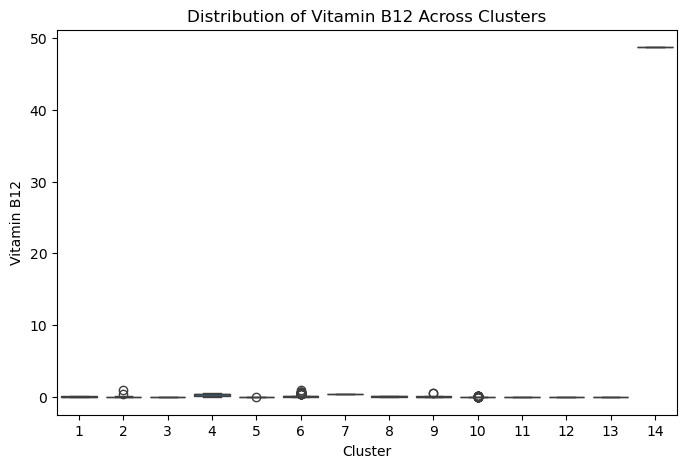

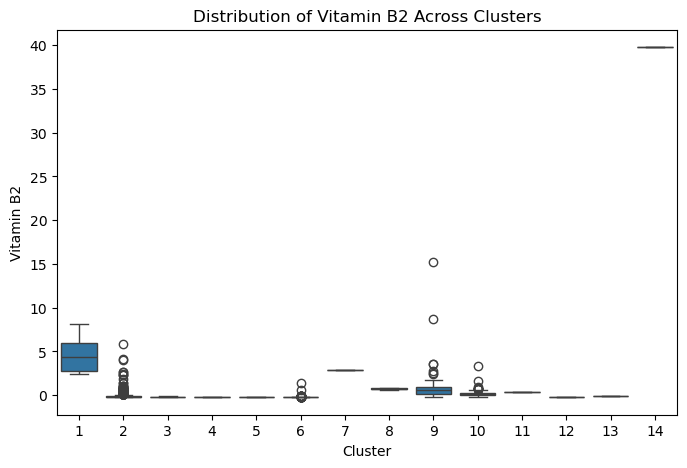

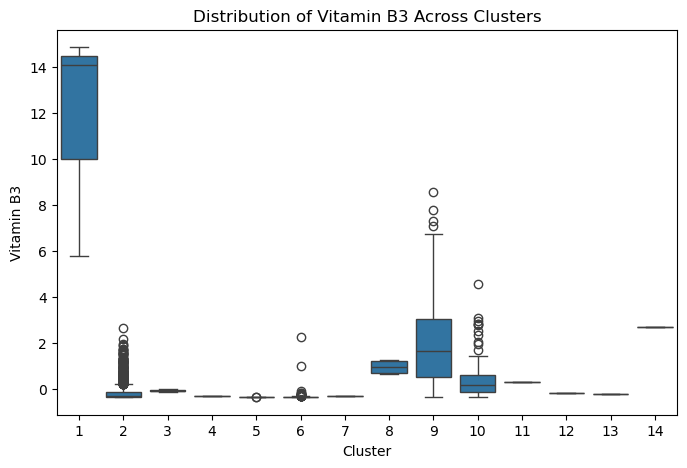

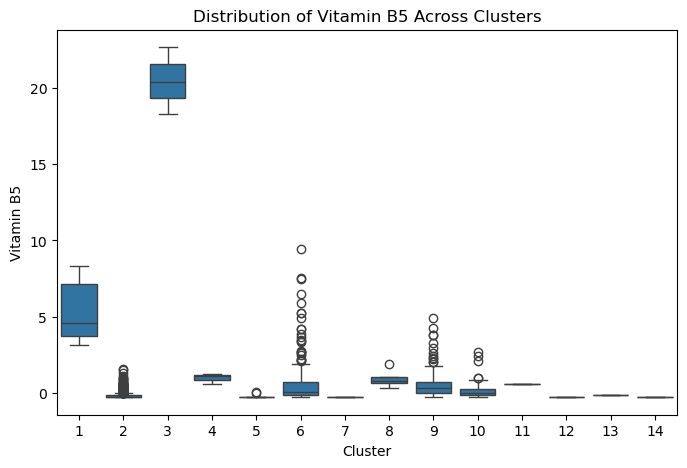

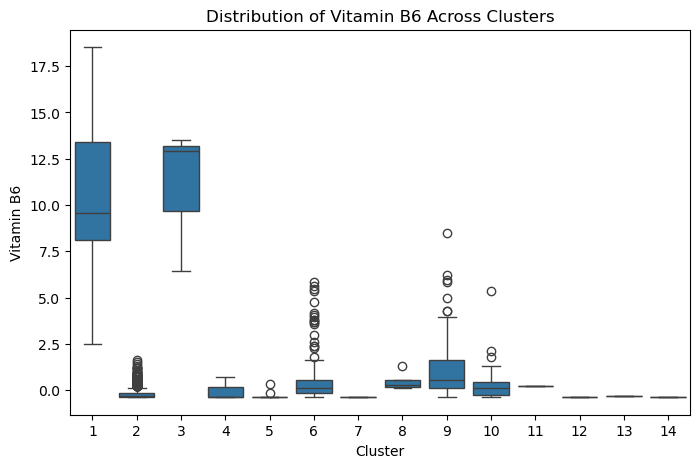

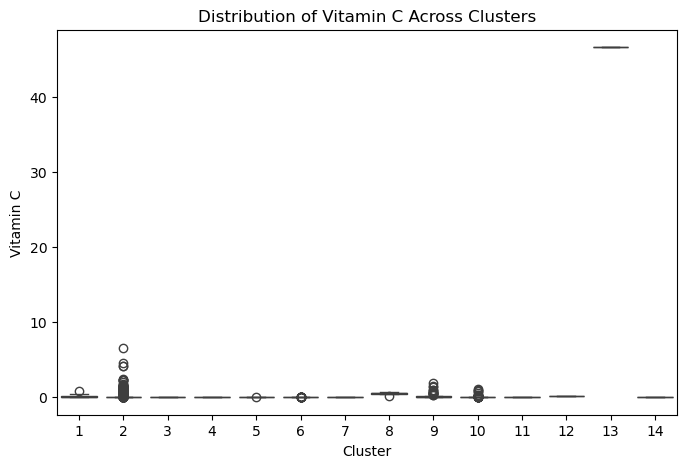

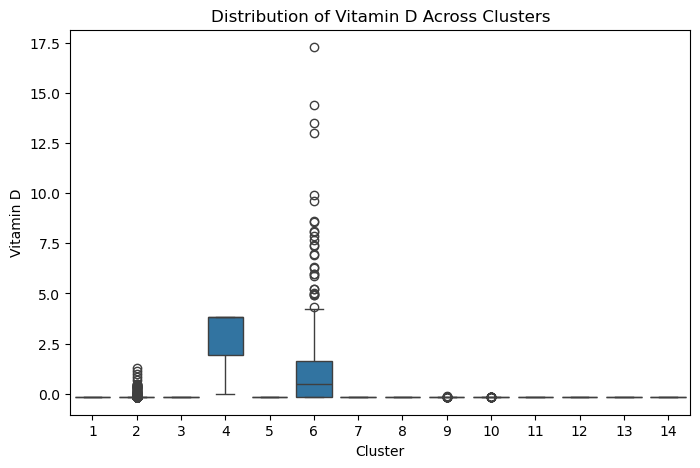

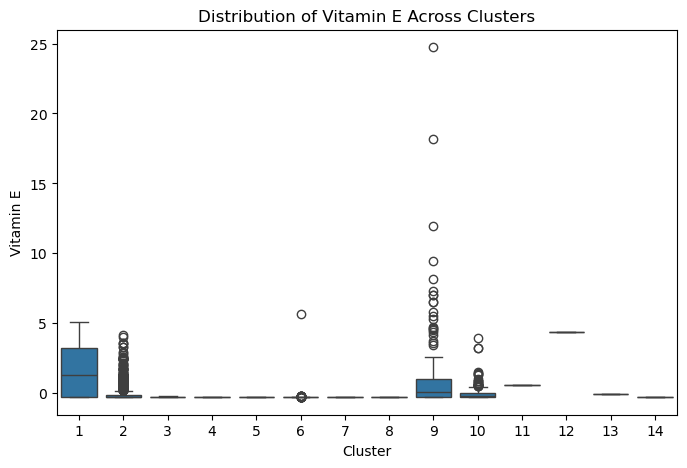

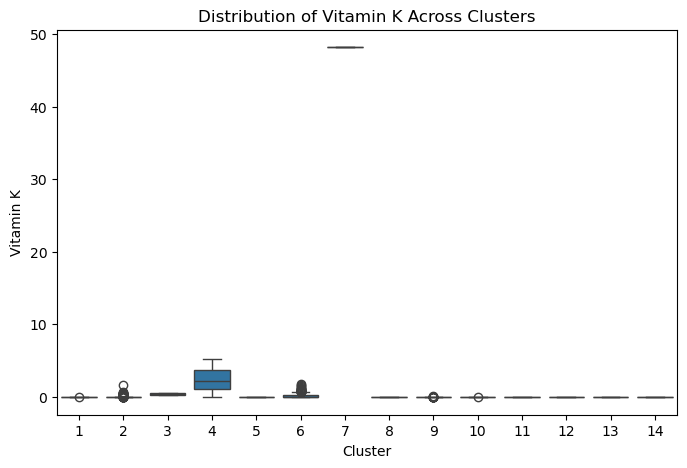

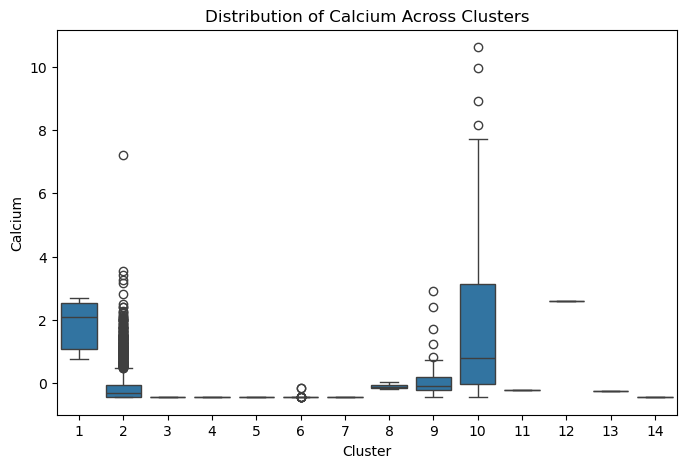

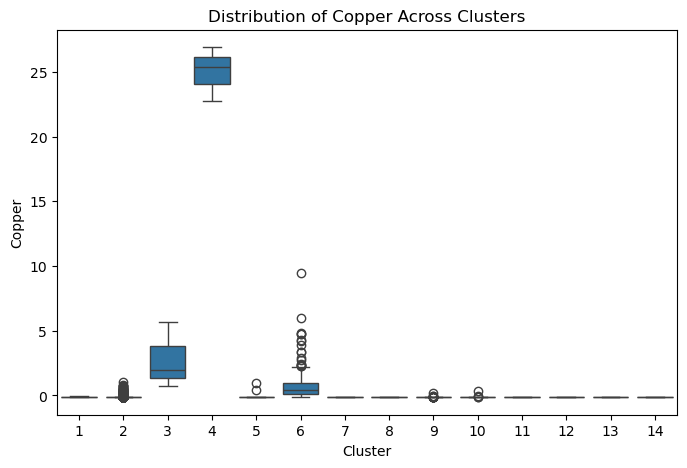

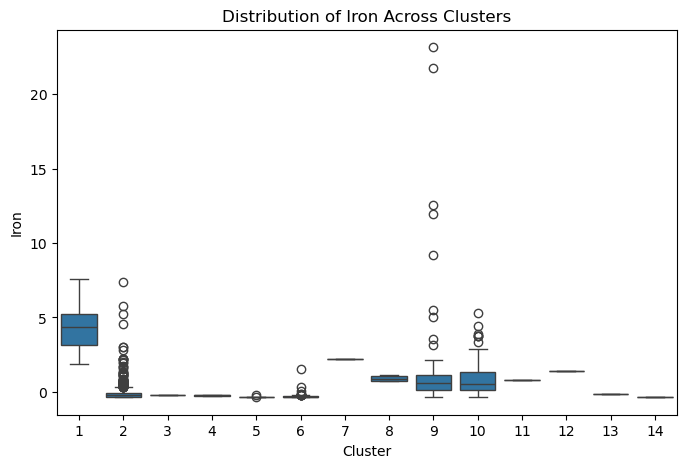

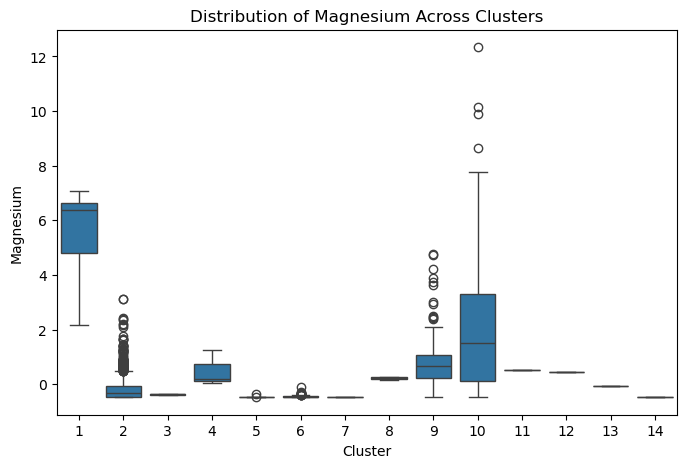

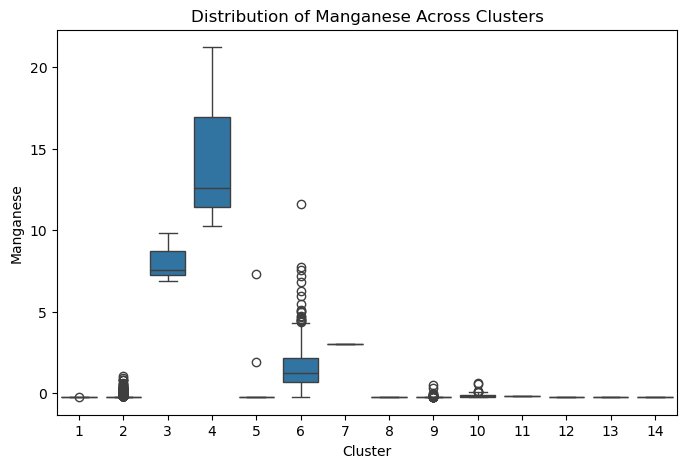

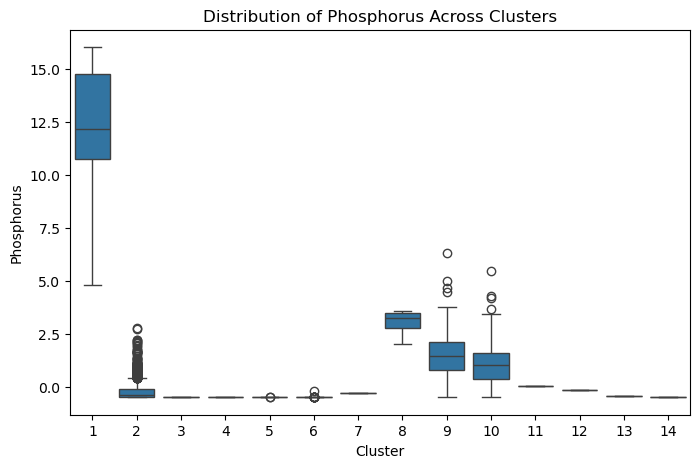

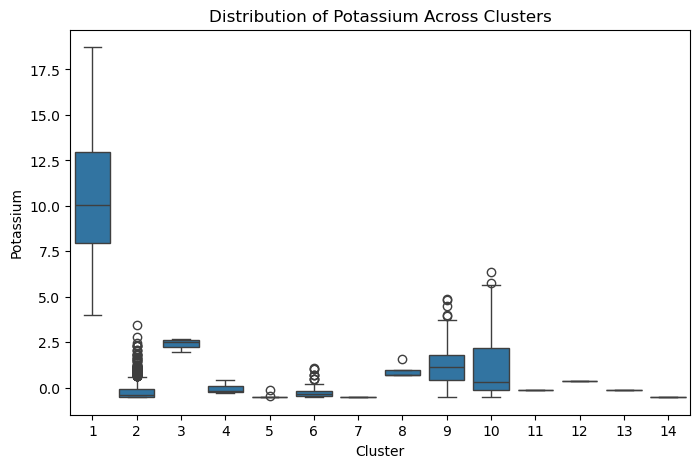

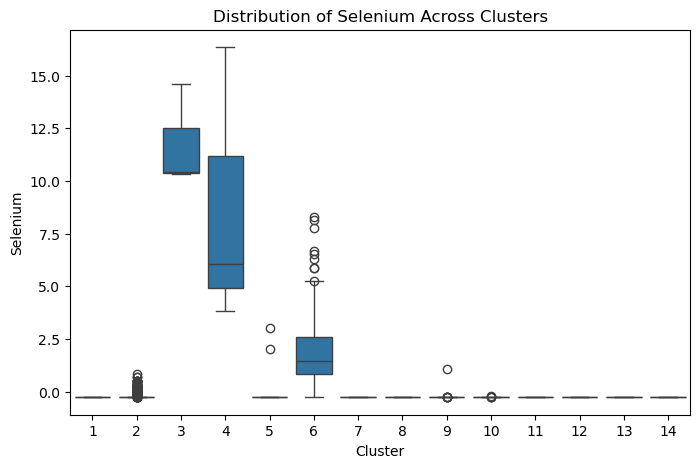

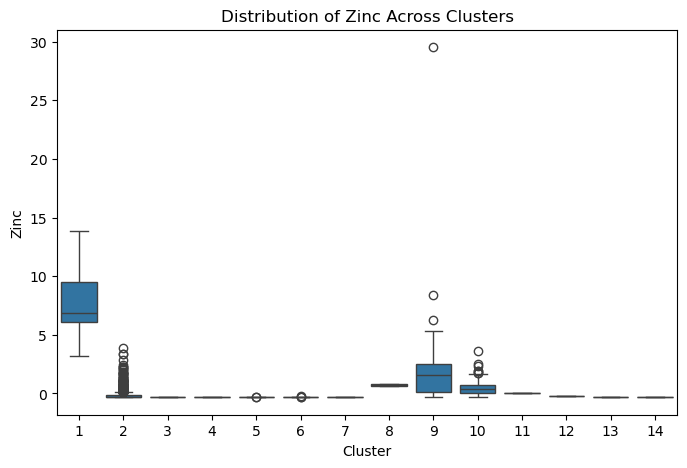

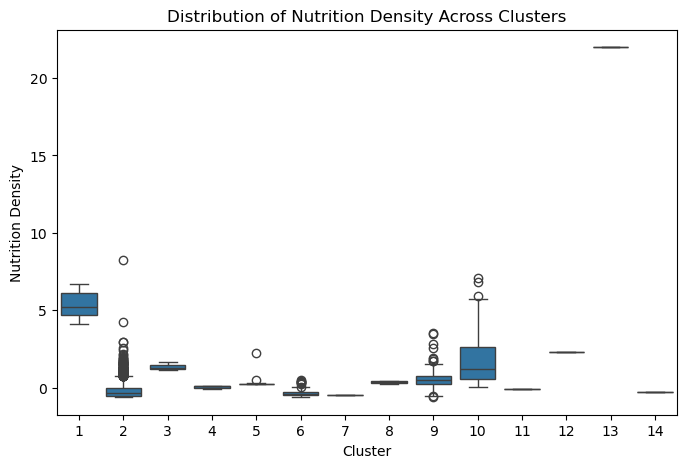

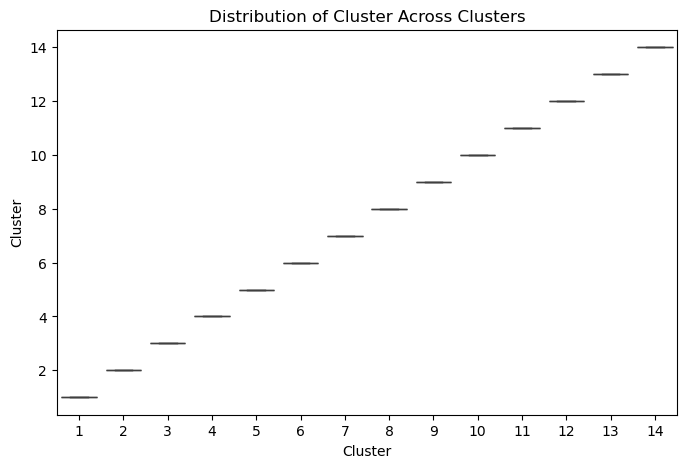

In [146]:
features_to_plot = x1.columns # visualize all numerical features

# Boxplot 
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X1['Cluster'], y=X1[feature])
    plt.title(f"Distribution of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

Summerize of the clusters:
- Cluster 1	High in Protein, Calories, Fats, Iron, Magnesium, Zinc	
- Cluster 3	High in Vitamin B5, B6, Selenium, B11 (Folic Acid)
- Cluster 4	High in Fiber, Vitamin D, Copper, Manganese, Vitamin K
- Cluster 5	High in Vitamin A
- Cluster 6	High in Sugars	Fruits, Sweetened Foods, Dairy
- Cluster 8	High in Cholesterol & Vitamin C	Egg Yolks, Liver, Citrus Fruits
- Cluster 10	High in Carbohydrates & Calcium	Grains, Dairy, Starchy Foods
- Cluster 12	High in Sodium & Vitamin E	Processed Foods, Nuts, Oils
- Cluster 13	High in Vitamin C & Overall Nutritional Density
- Cluster 14	High in Vitamin B1, B2, B12	Meat, Fish, Dairy, Fortified Foods

Other clusters do not have significant characteristics:
- Cluster 2 There are 1853 foods within this cluster (Too diverse to define a unique characteristic. Likely contains a mix of common foods)
- Cluster 9 Same situation as Cluster 2
- Cluster 7 english muffin mcdonalds 
- Cluster 11 muesli with fruit nuts

In [144]:
for cluster_num in X1['Cluster'].unique():
    cluster_foods = X1[X1['Cluster'] == cluster_num]
    print(f"\nTop foods in Cluster {cluster_num}:")
    print(cluster_foods[['food']].head(5)) 


Top foods in Cluster 2:
                               food
0                      cream cheese
1                 neufchatel cheese
2  requeijao cremoso light catupiry
3                    ricotta cheese
4              cream cheese low fat

Top foods in Cluster 10:
                            food
11             port salut cheese
17                gjetost cheese
21                asadero cheese
23  provolone cheese reduced fat
24              roquefort cheese

Top foods in Cluster 9:
                     food
66       kung pao chicken
83          lemon chicken
106       vegetarian stew
153  general tsos chicken
361  skipjack tuna cooked

Top foods in Cluster 6:
                        food
69         burrito with beef
71     enchilada with cheese
98   french fries deep fried
103          chili con carne
124         chicken sandwich

Top foods in Cluster 7:
                         food
262  english muffin mcdonalds

Top foods in Cluster 5:
                          food
570           

#### Exclude `Nutrition Density` Clustering

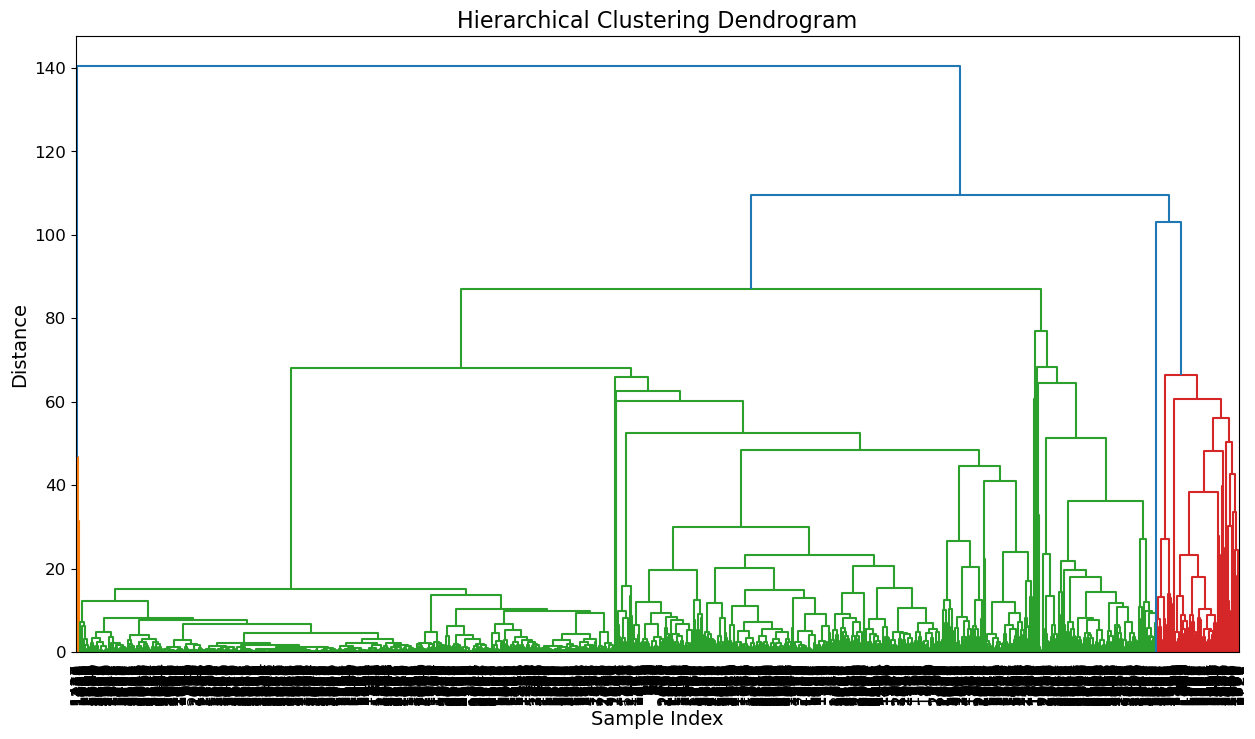

In [150]:
# Hierarchical Dendrogram
X2 = df1_scaled.copy()
x2 = X2.drop(['food', 'Nutrition Density'], axis = 1)
data2 = pd.DataFrame(X2, columns= x2.columns)

# Plot dendrogram
plot_dendrogram(data2)

In [152]:
# Cut the Hierarchical Tree to get clustering labels
data = pd.DataFrame(X2, columns=x2.columns)  
food_names = X2['food']  

# Get cluster labels
labels = hierarchical_clustering_with_cut(data, distance_threshold=50)

# Create a DataFrame to display results
clustered_foods = pd.DataFrame({'food': food_names, 'Cluster': labels})
print(clustered_foods.sort_values(by="Cluster"))

clustered_foods['Cluster'].value_counts()

                                                 food  Cluster
1438                            turkey breast roasted        1
1376                           pork arm picnic cooked        1
1406                                turkey breast raw        1
1339                         pork top loin roasts raw        1
1430                                    duck meat raw        1
...                                               ...      ...
1692                                nutmeg butter oil       18
2359                              tomato paste canned       18
1705                                      sheanut oil       18
1357                                 pork carcass raw       18
1477  smoothie high protein creamy chocolate slimfast       19

[2395 rows x 2 columns]


Cluster
2     1103
4      828
12     201
16     104
14      33
11      33
3       32
18      26
10      11
1        7
15       4
8        3
9        3
17       2
13       1
19       1
7        1
5        1
6        1
Name: count, dtype: int64

In [154]:
# Merge back to the original dataset - food name + corresponding clustering
X2 = pd.merge(X2, clustered_foods, on = 'food', how = 'left')
x2 = X2.drop(['food','Nutrition Density'] , axis = 1)

In [156]:
# Check the clustering with few foods
clustered_foods[X2['Cluster'].isin([7, 5, 6, 19, 13])]

,food,Cluster
262,english muffin mcdonalds,13
1477,smoothie high protein creamy chocolate slimfast,19
1543,acerola cherry juice,7
1667,muesli with fruit nuts,5
1943,adobo fresco,6


In [158]:
# Group data by clusters and calculate mean values
cluster_summary = x2.groupby('Cluster').mean()
print(cluster_summary.T)


# Find the cluster with the highest value for each feature
highest_cluster_per_feature = cluster_summary.idxmax(axis=0)
highest_cluster_df = pd.DataFrame({'Feature': cluster_summary.columns, 'Highest Cluster': highest_cluster_per_feature.values})

print(highest_cluster_df)


# Find Which Cluster Has the Highest Value for Each Feature (Only for Clusters with More Than 1 Element)
valid_clusters = clustered_foods['Cluster'].value_counts()
valid_clusters = valid_clusters[valid_clusters > 1].index  # Clusters with count > 1

filtered_cluster_summary = cluster_summary.loc[valid_clusters]
highest_valid_cluster_per_feature = filtered_cluster_summary.idxmax(axis=0)
highest_valid_cluster_df = pd.DataFrame({'Feature': filtered_cluster_summary.columns, 'Highest Cluster': highest_valid_cluster_per_feature.values})

print(highest_valid_cluster_df)

Cluster                      1         2         3         4          5   \
Caloric Value         11.397292 -0.400601  0.535504  0.117181   0.018798   
Fat                   10.413092 -0.244246  0.581041 -0.030068  -0.233642   
Saturated Fats         4.673149 -0.131709  0.504859 -0.071637  -0.175653   
Monounsaturated Fats  10.255997 -0.193628  0.296932 -0.046804  -0.226764   
Polyunsaturated Fats   6.489340 -0.191118  0.156196  0.032969  -0.105378   
Carbohydrates         -0.632280 -0.420392 -0.149712  0.503894   0.922142   
Sugars                -0.334214 -0.198283 -0.135521  0.273697   0.730482   
Protein               12.590871 -0.326315  0.586794  0.008310  -0.281867   
Dietary Fiber         -0.413778 -0.324308 -0.180705  0.144295   0.659629   
Cholesterol            3.581917 -0.128437  0.100302 -0.045940  -0.161371   
Sodium                 1.004045 -0.156710  0.594612  0.143833  -0.173753   
Water                 10.110566 -0.540945  0.064696  0.371080  -0.672222   
Vitamin A   


- Cluster 1	Protein, Fat, Calories, Zinc, Iron, Potassium
- Cluster 3	Calcium
- Cluster 5	Sugars, B11 (Folic Acid)
- Cluster 6	Sodium
- Cluster 7	Vitamin C
- Cluster 8	B5, B6, Selenium, B11
- Cluster 9	Fiber, Copper, Manganese, B12, Vitamin K
- Cluster 10	Vitamin A
- Cluster 11	Vitamin D, Sugars
- Cluster 13	Vitamin K
- Cluster 14	Carbohydrates
- Cluster 15	Cholesterol, Vitamin C
- Cluster 17	Saturated Fats
- Cluster 18	Vitamin E
- Cluster 19	B1, B2, B12	

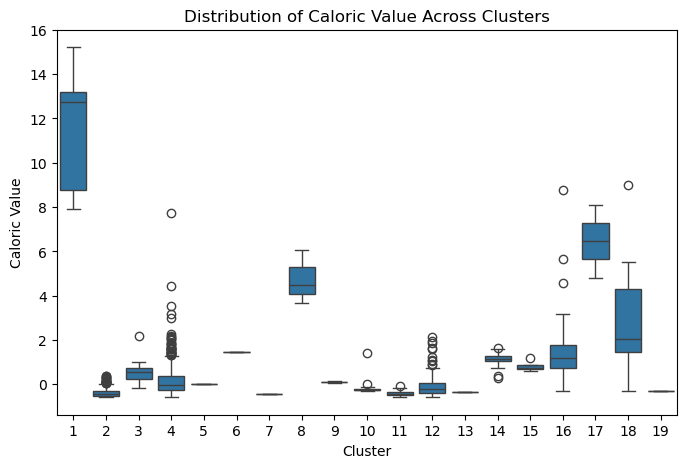

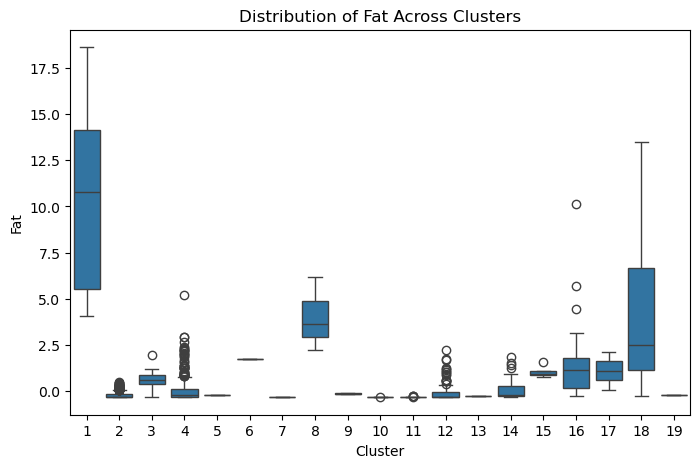

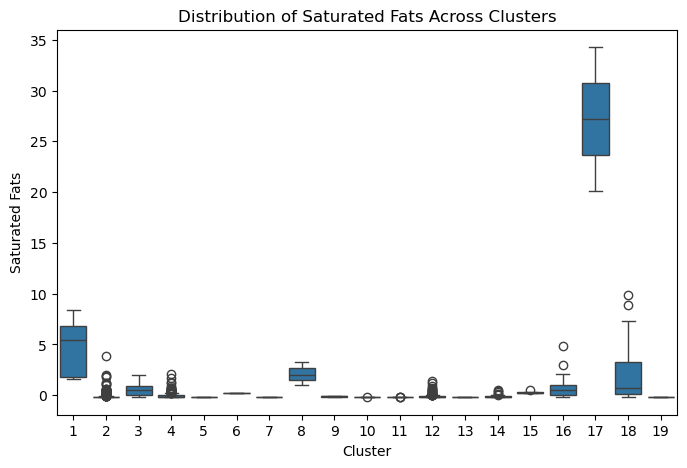

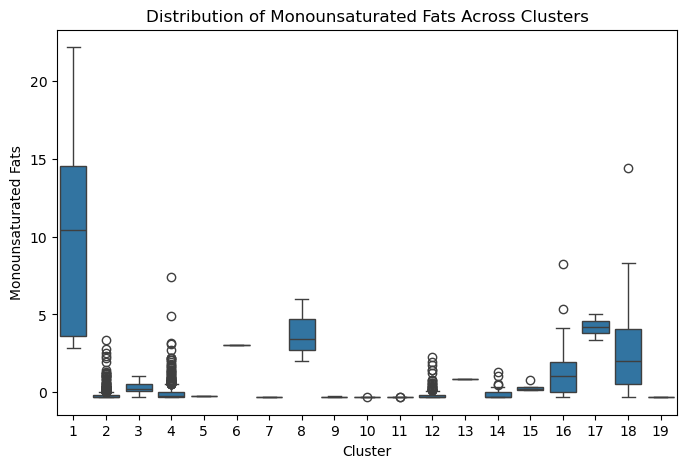

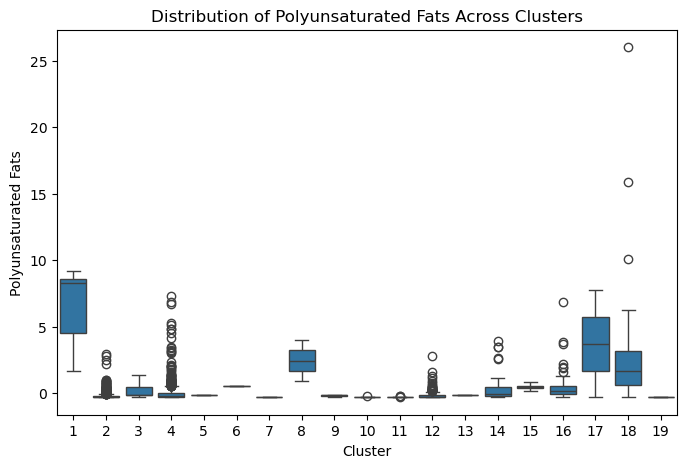

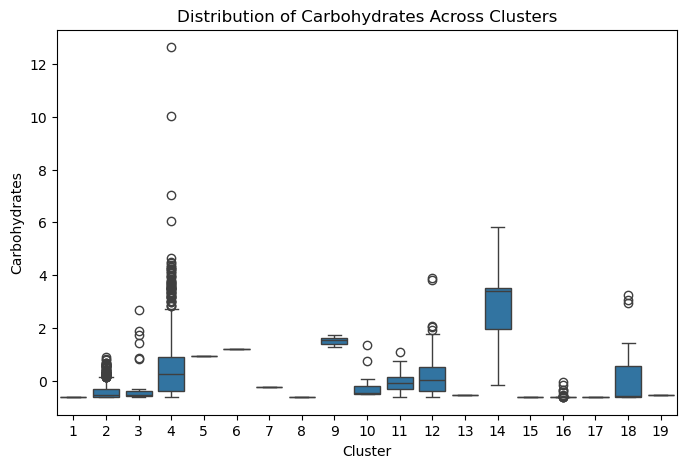

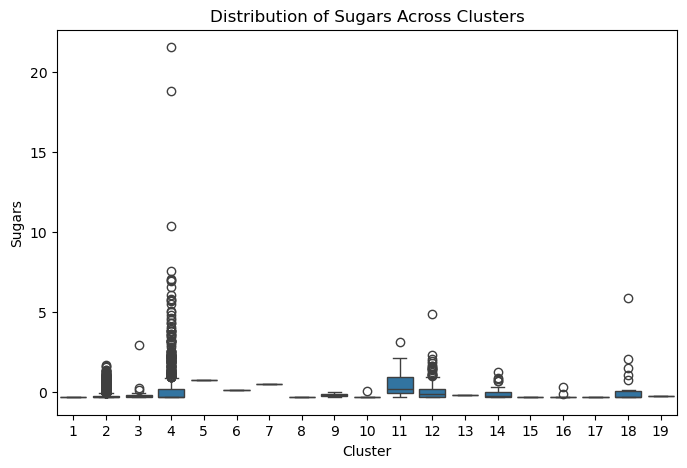

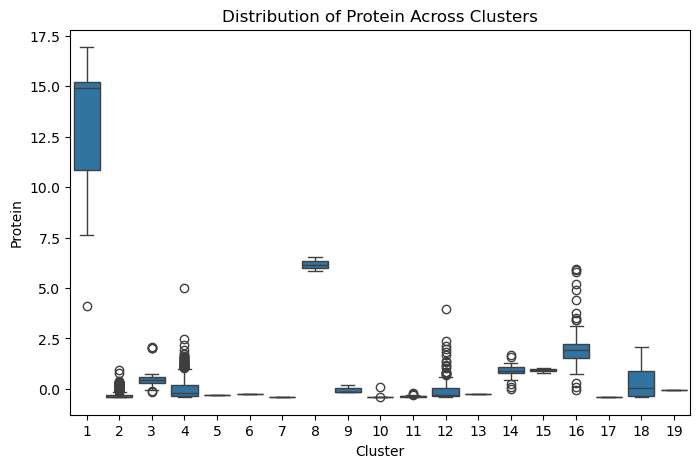

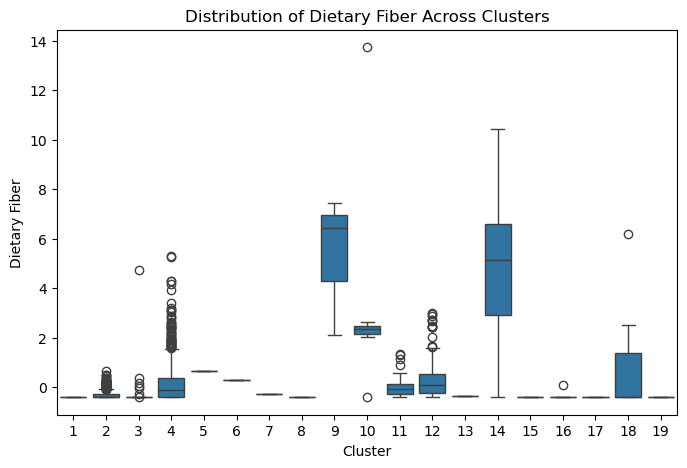

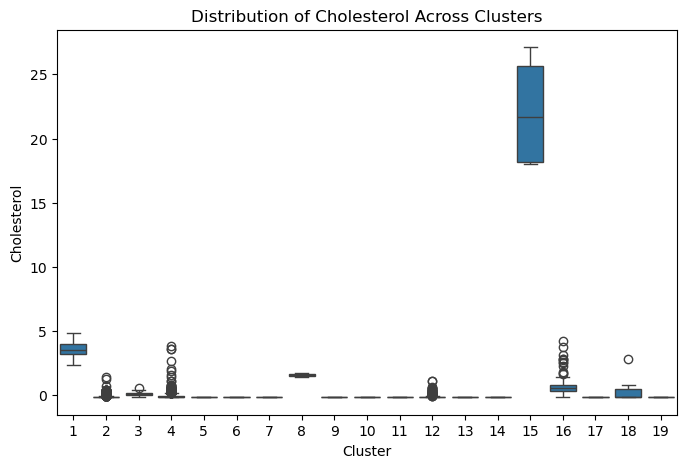

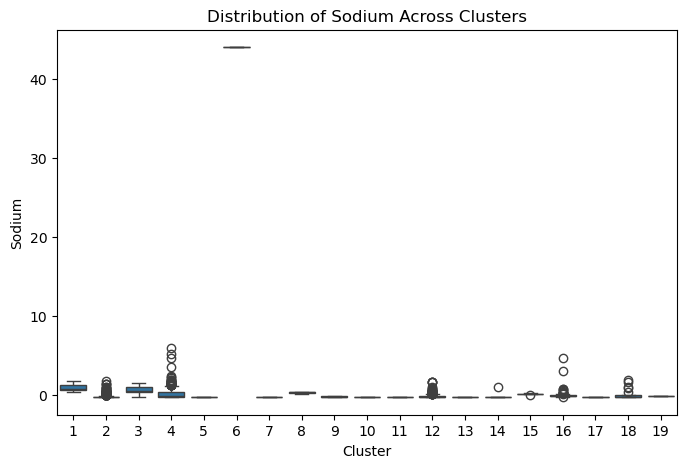

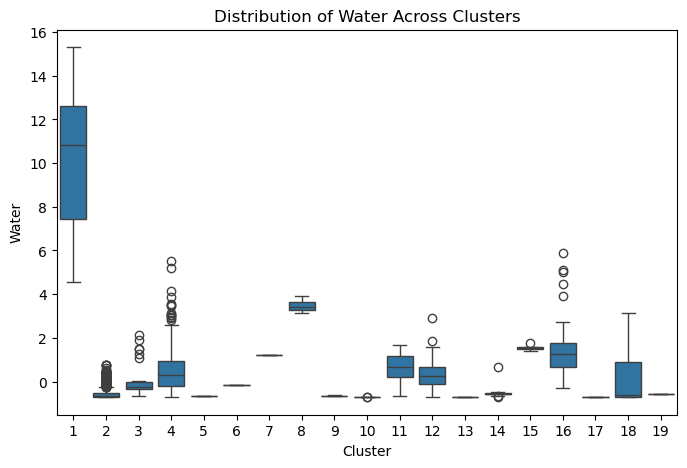

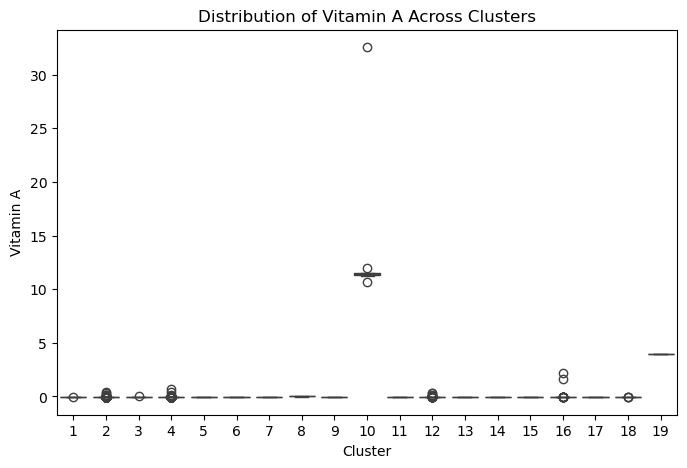

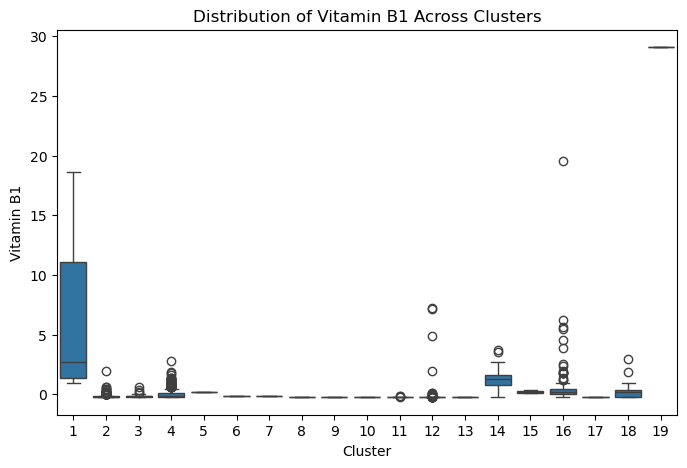

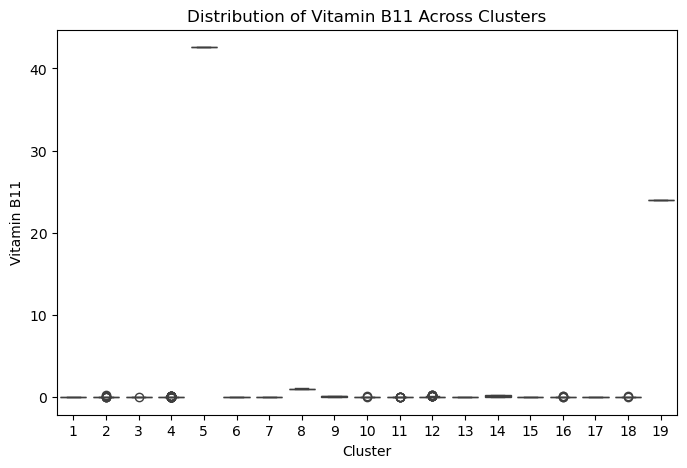

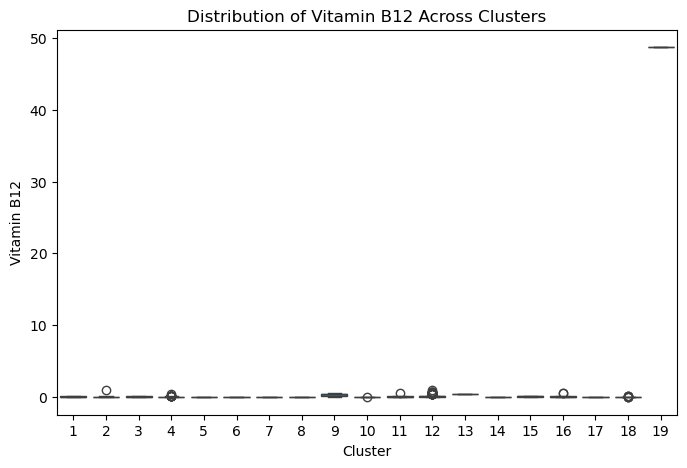

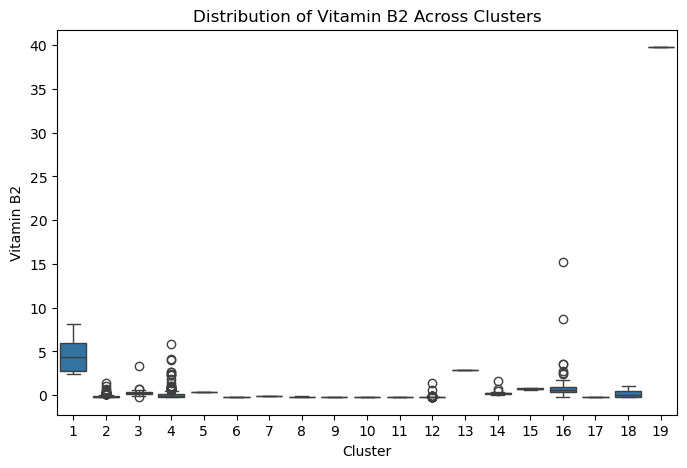

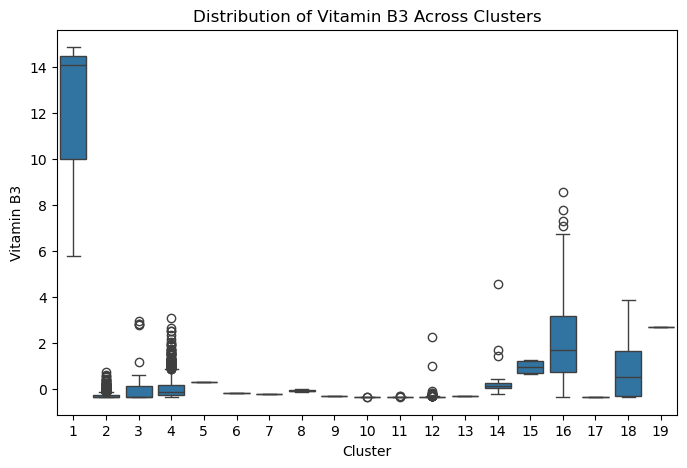

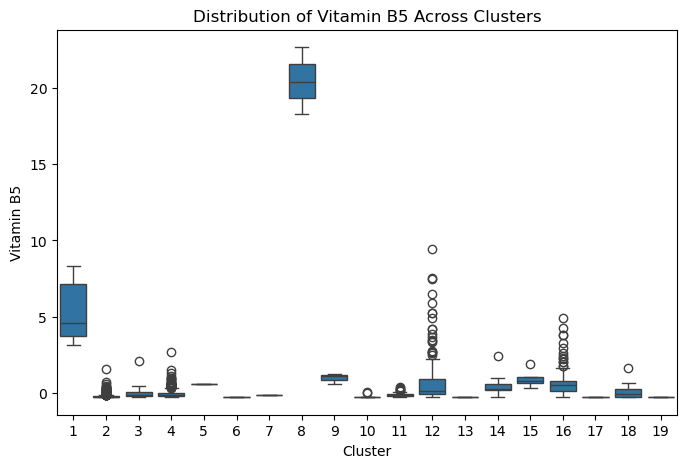

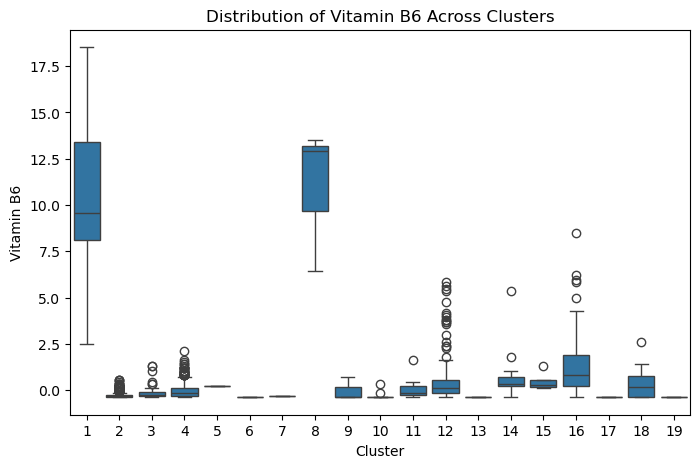

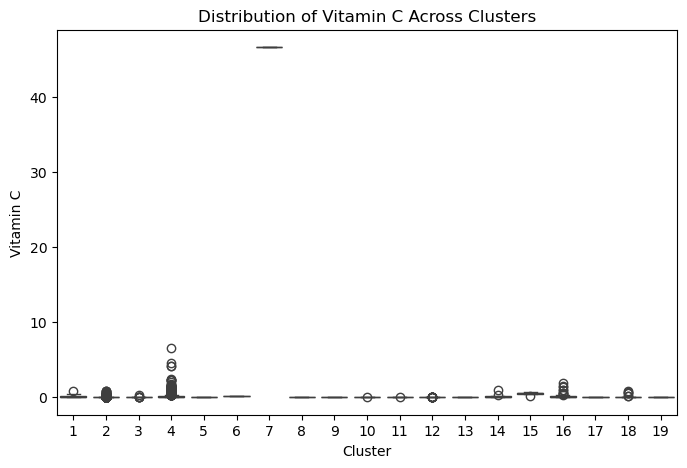

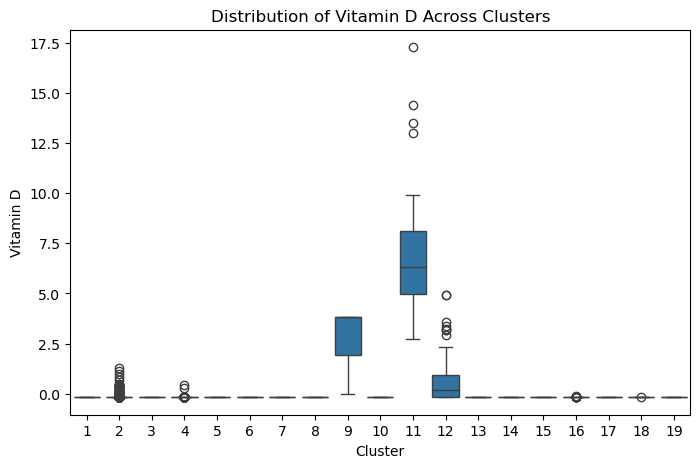

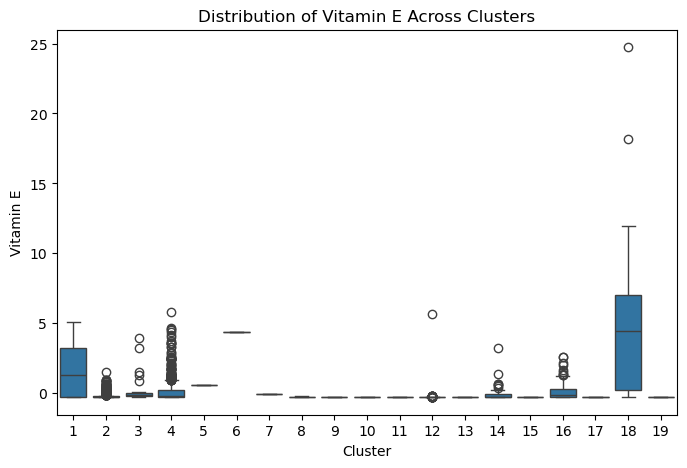

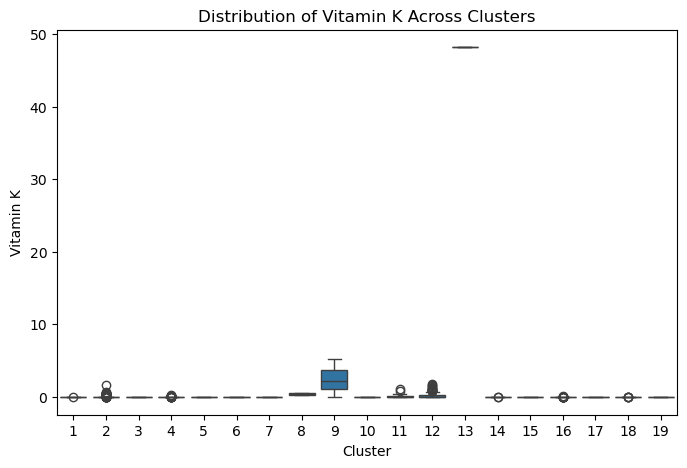

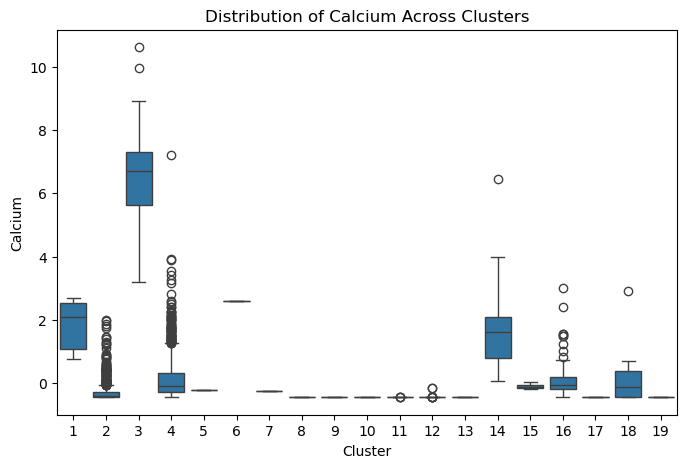

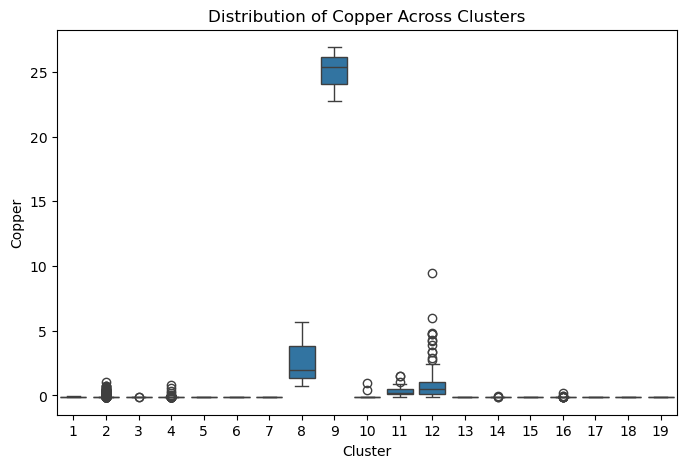

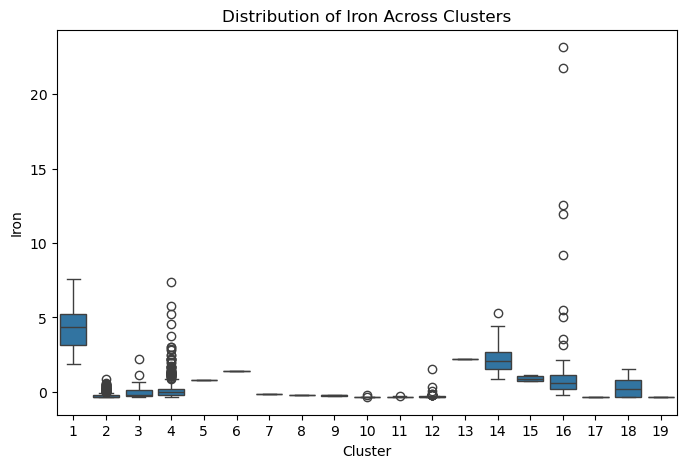

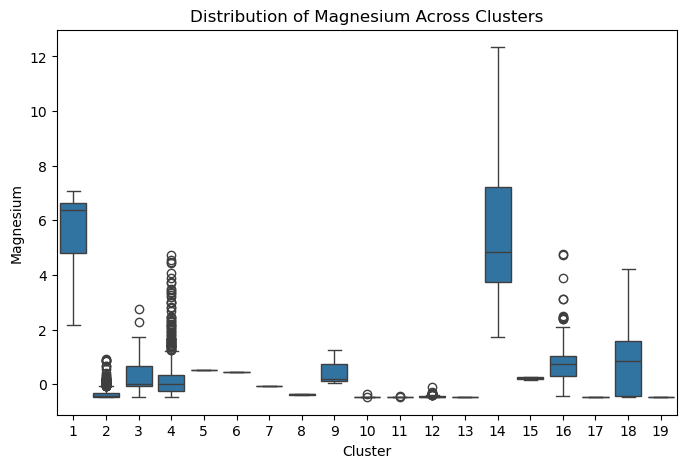

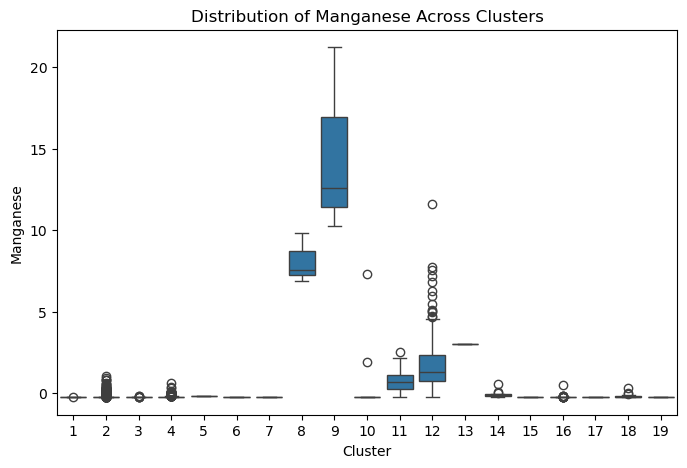

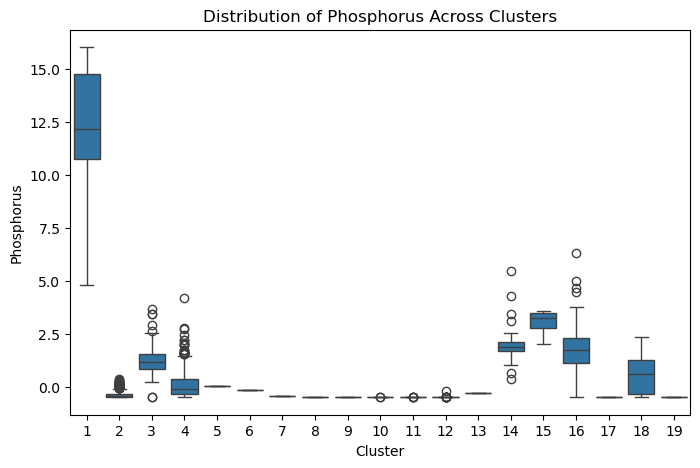

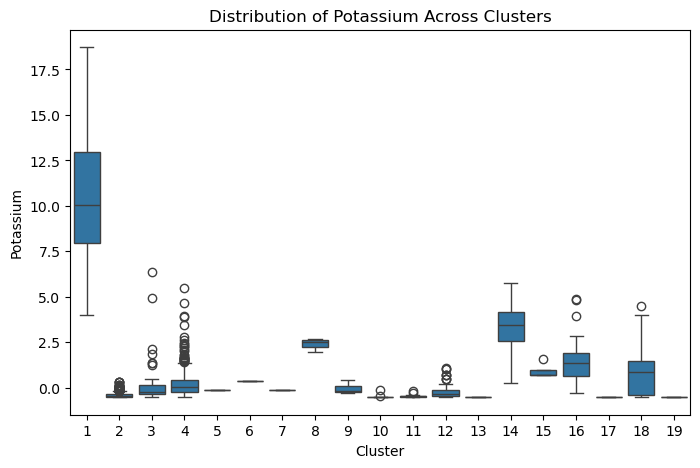

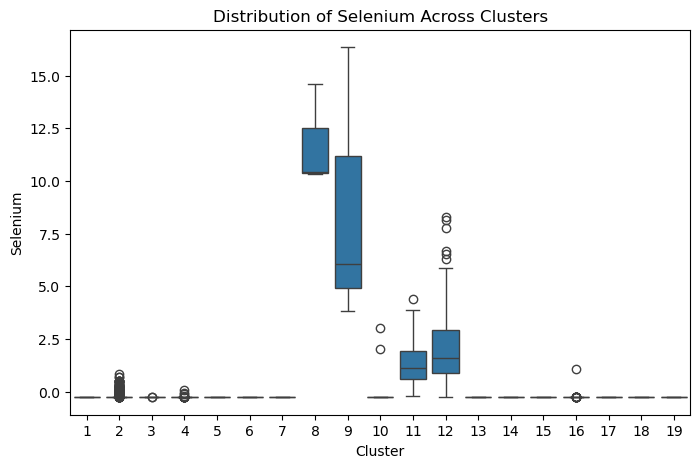

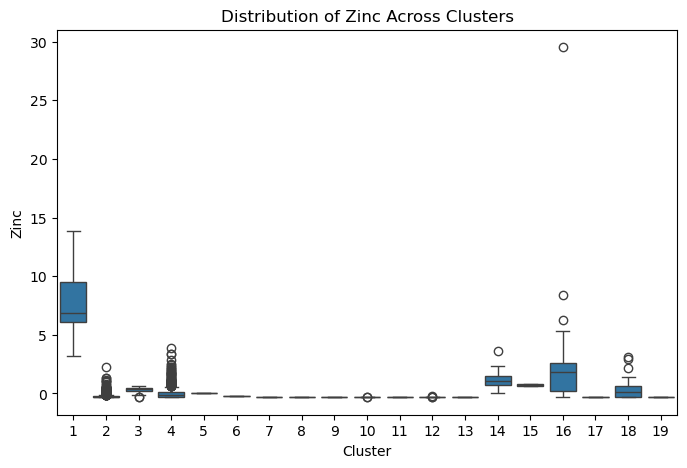

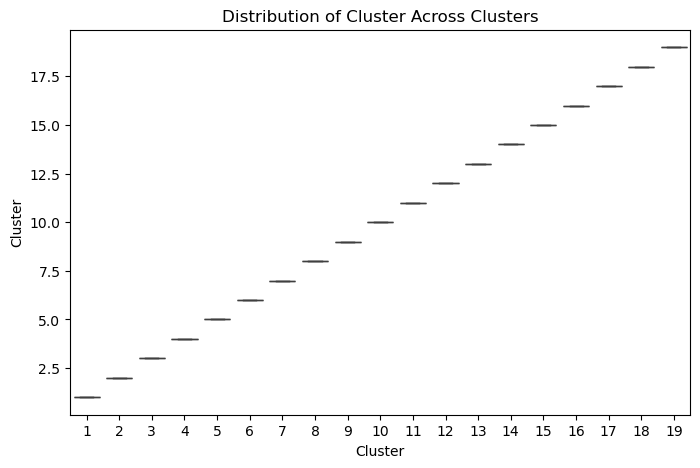

In [160]:
# visualize all numerical features
features_to_plot = x2.columns

# Boxplot 
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X2['Cluster'], y=X2[feature])
    plt.title(f"Distribution of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

In [164]:
# Sample food within each clusterig
for cluster_num in X2['Cluster'].unique():
    cluster_foods = X2[X2['Cluster'] == cluster_num]
    print(f"\nTop foods in Cluster {cluster_num}:")
    print(cluster_foods[['food']].head(5)) 


Top foods in Cluster 2:
                               food
0                      cream cheese
1                 neufchatel cheese
2  requeijao cremoso light catupiry
3                    ricotta cheese
4              cream cheese low fat

Top foods in Cluster 3:
                            food
11             port salut cheese
17                gjetost cheese
21                asadero cheese
23  provolone cheese reduced fat
24              roquefort cheese

Top foods in Cluster 16:
                     food
47          cheese spread
106       vegetarian stew
345     northern pike raw
348        pollock cooked
361  skipjack tuna cooked

Top foods in Cluster 4:
                                    food
56                           corn tamale
57  baked potato with cheese sauce bacon
60            enchilada with cheese beef
61        corned beef hash with potatoes
62         biscuit with egg cheese bacon

Top foods in Cluster 18:
                             food
66               kung p

#### `Vitamin` Clustering

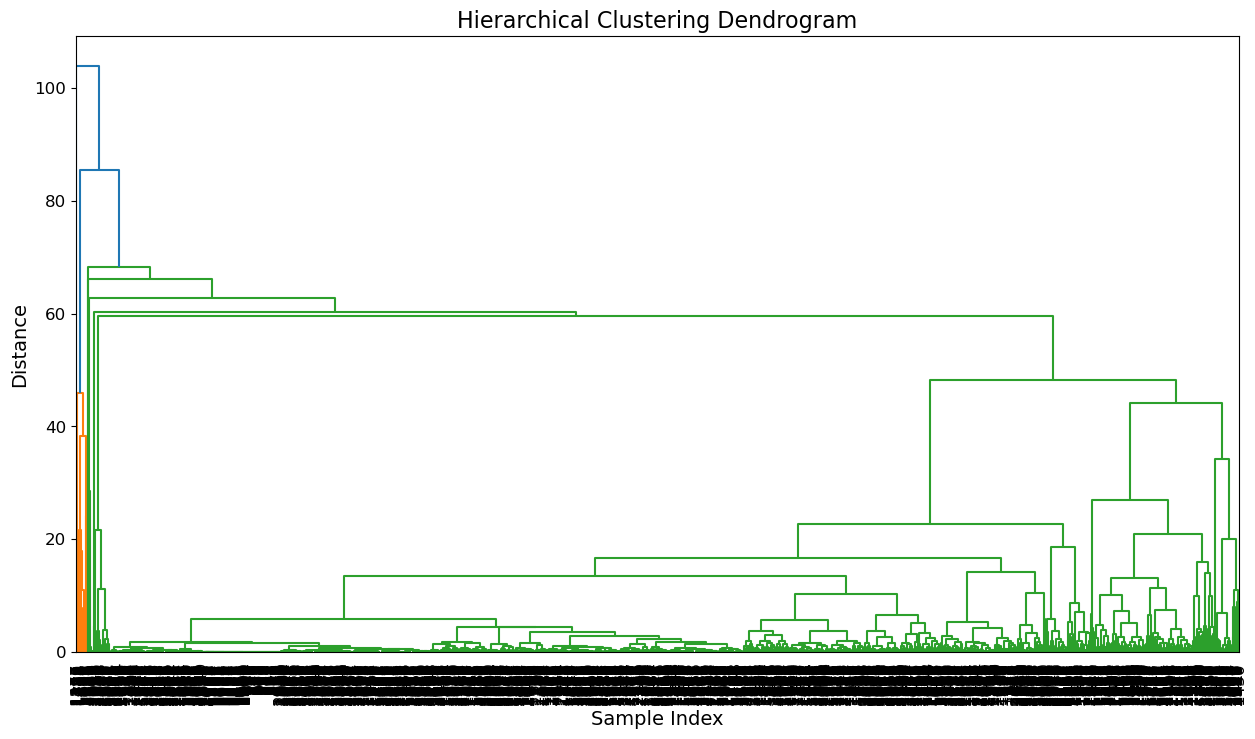

In [250]:
# Hierarchical Dendrogram
X3 = df1_scaled.copy()
vitamin_features = [
    "Vitamin A", "Vitamin B1", "Vitamin B11", "Vitamin B12",
    "Vitamin B2", "Vitamin B3", "Vitamin B5", "Vitamin B6",
    "Vitamin C", "Vitamin D", "Vitamin E", "Vitamin K"
]

x3 = X3[vitamin_features]
data3 = pd.DataFrame(X3, columns= x3.columns)

# Plot dendrogram
plot_dendrogram(data3)

In [251]:
# Cut the Hierarchical Tree to get clustering labels
data = pd.DataFrame(X3, columns=x3.columns)  
food_names = X3['food']  

# Get cluster labels
labels = hierarchical_clustering_with_cut(data, distance_threshold=40)

# Create a DataFrame to display results
clustered_foods = pd.DataFrame({'food': food_names, 'Cluster': labels})
print(clustered_foods.sort_values(by="Cluster"))

clustered_foods['Cluster'].value_counts()

                                                 food  Cluster
1395                     pork top loin roasts roasted        1
1389                            pork backribs roasted        1
1385                   pork centre rib roasts roasted        1
1277                                 emu drums cooked        2
1275                                emu fillet cooked        2
...                                               ...      ...
688               yellow cake with chocolate frosting        7
1667                           muesli with fruit nuts        8
1543                             acerola cherry juice        9
262                          english muffin mcdonalds       10
1477  smoothie high protein creamy chocolate slimfast       11

[2395 rows x 2 columns]


Cluster
5     2020
6      256
7       50
4       32
2       19
3       11
1        3
10       1
11       1
9        1
8        1
Name: count, dtype: int64

In [252]:
# Merge back to the original dataset - food name + corresponding clustering
X3 = pd.merge(X3, clustered_foods, on = 'food', how = 'left')

In [253]:
x3 = X3[[
    "Vitamin A", "Vitamin B1", "Vitamin B11", "Vitamin B12",
    "Vitamin B2", "Vitamin B3", "Vitamin B5", "Vitamin B6",
    "Vitamin C", "Vitamin D", "Vitamin E", "Vitamin K", "Cluster"]]

In [254]:
# Check the clustering with few foods
clustered_foods[X3['Cluster'].isin([1, 10, 11, 9, 8])]

,food,Cluster
262,english muffin mcdonalds,10
1385,pork centre rib roasts roasted,1
1389,pork backribs roasted,1
1395,pork top loin roasts roasted,1
1477,smoothie high protein creamy chocolate slimfast,11
1543,acerola cherry juice,9
1667,muesli with fruit nuts,8


In [262]:
# Group data by clusters and calculate mean values
cluster_summary = x3.groupby('Cluster').mean()
print(cluster_summary.T)


# Find the cluster with the highest value for each feature
highest_cluster_per_feature = cluster_summary.idxmax(axis=0)
highest_cluster_df = pd.DataFrame({'Feature': cluster_summary.columns, 'Highest Cluster': highest_cluster_per_feature.values})

print(highest_cluster_df)


# Find Which Cluster Has the Highest Value for Each Feature (Only for Clusters with More Than 1 Element)
valid_clusters = clustered_foods['Cluster'].value_counts()
valid_clusters = valid_clusters[valid_clusters > 1].index  # Clusters with count > 1

filtered_cluster_summary = cluster_summary.loc[valid_clusters]
highest_valid_cluster_per_feature = filtered_cluster_summary.idxmax(axis=0)
highest_valid_cluster_df = pd.DataFrame({'Feature': filtered_cluster_summary.columns, 'Highest Cluster': highest_valid_cluster_per_feature.values})

print(highest_valid_cluster_df)

Cluster             1         2          3         4         5         6   \
Vitamin A     0.026533  0.148388  13.322104 -0.069387 -0.065514 -0.060733   
Vitamin B1   -0.208629  4.994189  -0.237936 -0.231415 -0.132065  0.562968   
Vitamin B11   0.970239 -0.024866  -0.034422 -0.021463 -0.032007 -0.006487   
Vitamin B12  -0.075559  0.067205  -0.071476  0.026905 -0.023020 -0.003105   
Vitamin B2   -0.168638  3.796226  -0.225374 -0.225374 -0.112561  0.465334   
Vitamin B3   -0.069886  7.723141  -0.363587 -0.352522 -0.220906  1.178731   
Vitamin B5   20.479160  3.599879  -0.242290 -0.044851 -0.130865  0.540281   
Vitamin B6   10.948046  6.876934  -0.288529  0.035693 -0.185610  0.840591   
Vitamin C    -0.041344  0.049199  -0.094899 -0.092322 -0.018613 -0.025504   
Vitamin D    -0.175732 -0.170197  -0.175732  7.385722 -0.089954 -0.154269   
Vitamin E    -0.245344  0.820222  -0.281226 -0.281226 -0.135326  0.133505   
Vitamin K     0.396607 -0.048393  -0.057626  0.111625 -0.020396 -0.030432   

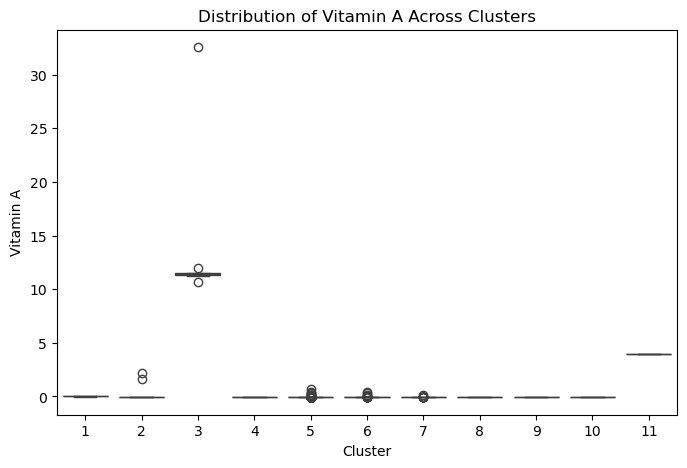

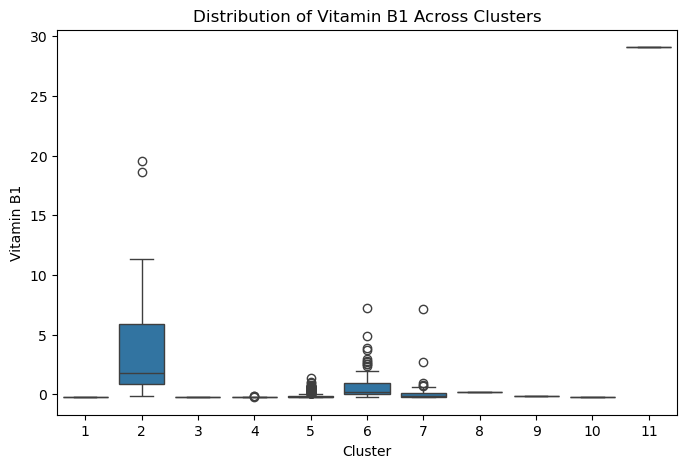

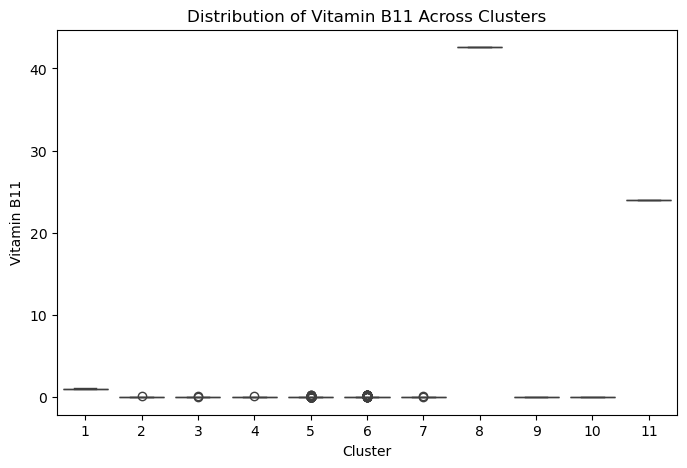

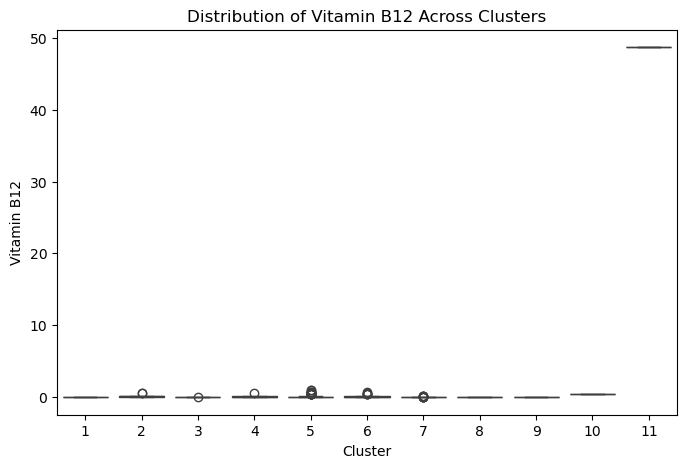

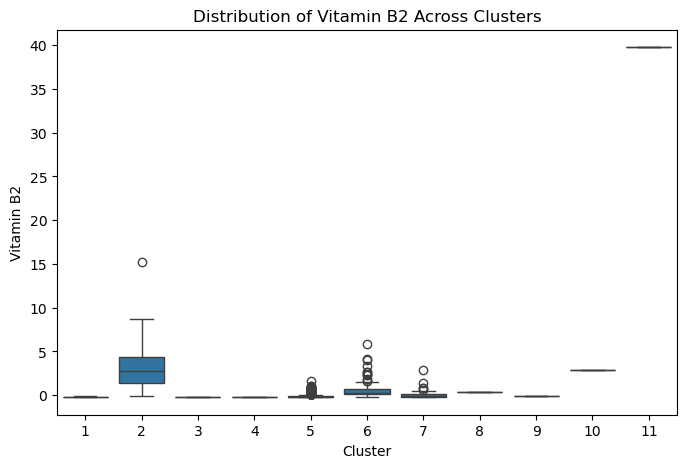

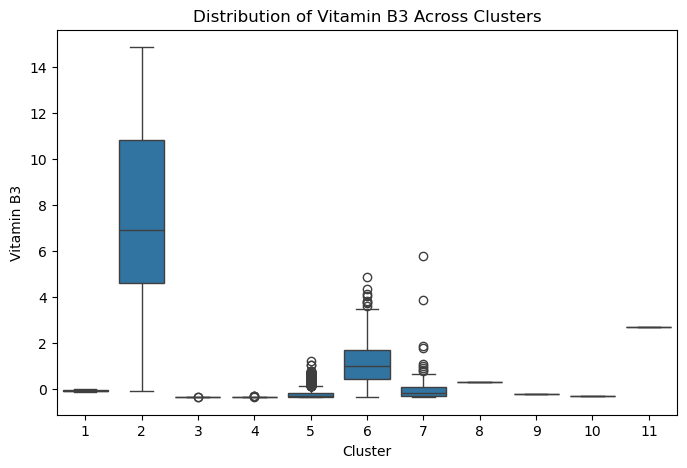

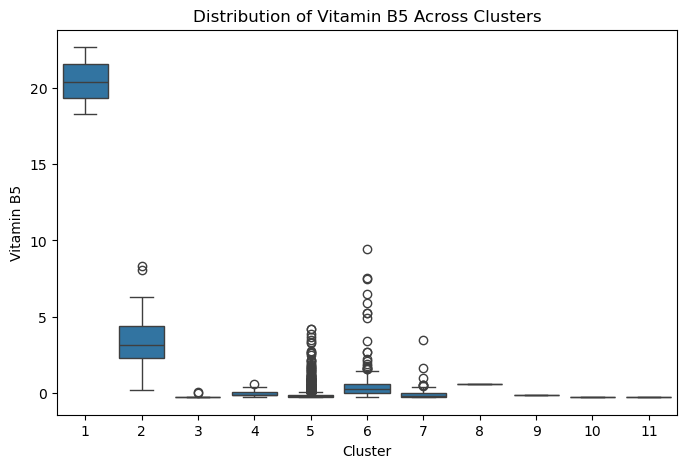

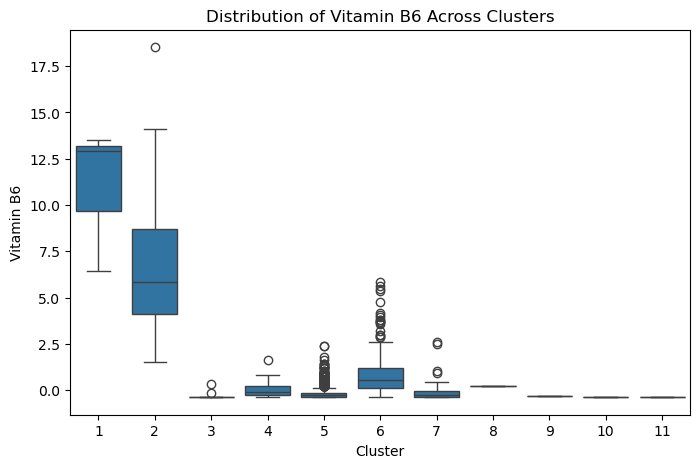

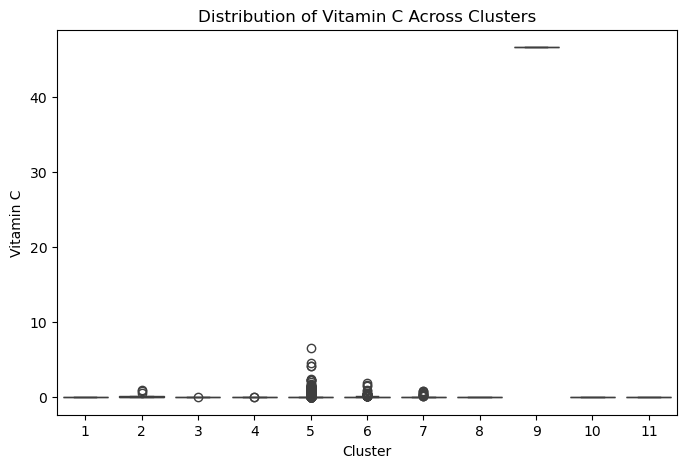

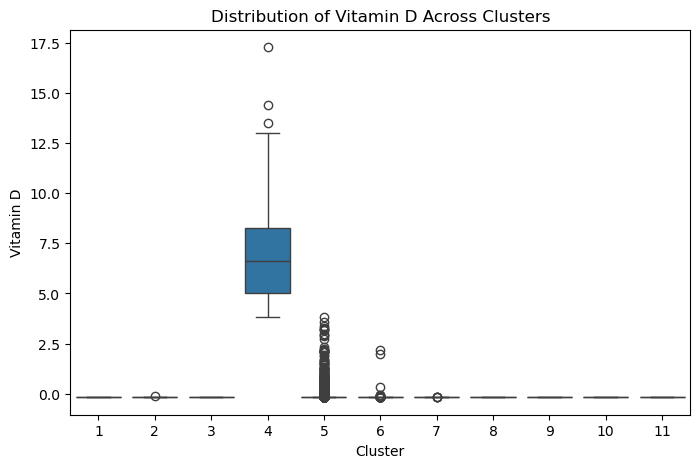

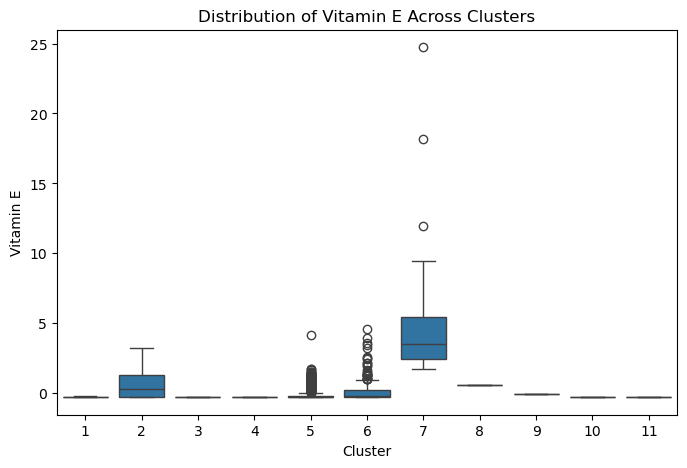

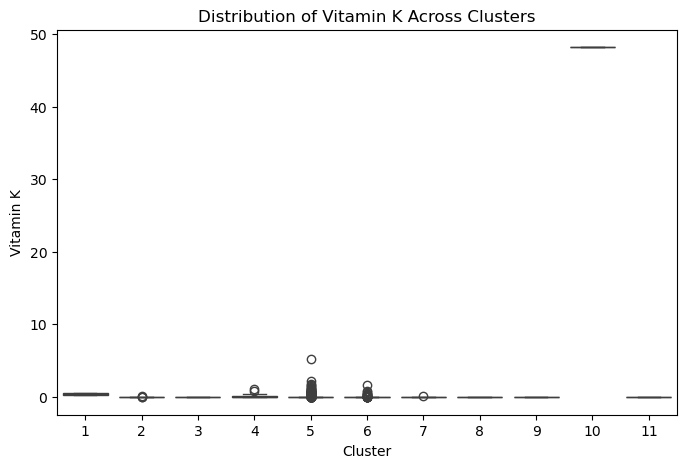

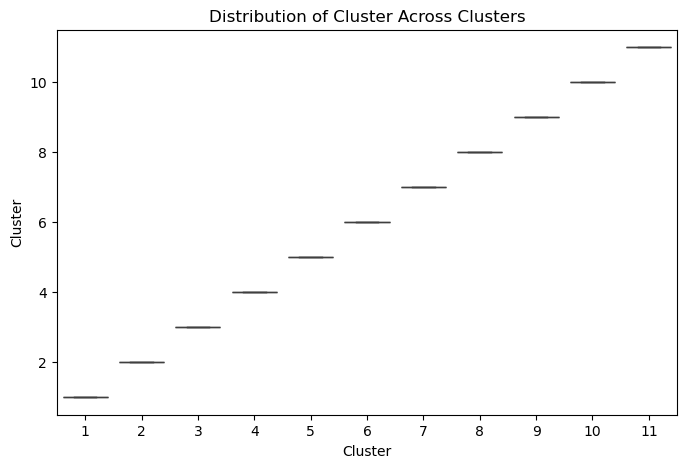

In [264]:
# visualize all numerical features
features_to_plot = x3.columns

# Boxplot 
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X3['Cluster'], y=X3[feature])
    plt.title(f"Distribution of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

- Cluster 1	High in Vitamin B5, B6, B11
- Cluster 2	High in Vitamin B1, B3, B12, Vitamin C
- Cluster 3	High in Vitamin A
- Cluster 4	High in Vitamin D
- Cluster 7	High in Vitamin E
- Cluster 8	High in Vitamin B11 (Folic Acid)
- Cluster 9	High in Vitamin C
- Cluster 10	High in Vitamin K
- Cluster 11	High in Vitamin B1, B2, B12

In [266]:
# Sample food within each clusterig
for cluster_num in X3['Cluster'].unique():
    cluster_foods = X3[X3['Cluster'] == cluster_num]
    print(f"\nTop foods in Cluster {cluster_num}:")
    print(cluster_foods[['food']].head(5)) 


Top foods in Cluster 5:
                               food
0                      cream cheese
1                 neufchatel cheese
2  requeijao cremoso light catupiry
3                    ricotta cheese
4              cream cheese low fat

Top foods in Cluster 6:
                 food
17     gjetost cheese
65          corn rice
66   kung pao chicken
83      lemon chicken
103   chili con carne

Top foods in Cluster 7:
                        food
231     cream of celery soup
233         tomato rice soup
279  onion rings burger king
417               salmon raw
451                  eel raw

Top foods in Cluster 10:
                         food
262  english muffin mcdonalds

Top foods in Cluster 2:
                      food
361   skipjack tuna cooked
775              rice bran
1275     emu fillet cooked
1277      emu drums cooked
1314     lamb liver cooked

Top foods in Cluster 3:
                          food
570             gamay red wine
571    late harvest white wine
575  muller 

#### `Mineral Element` Clustering

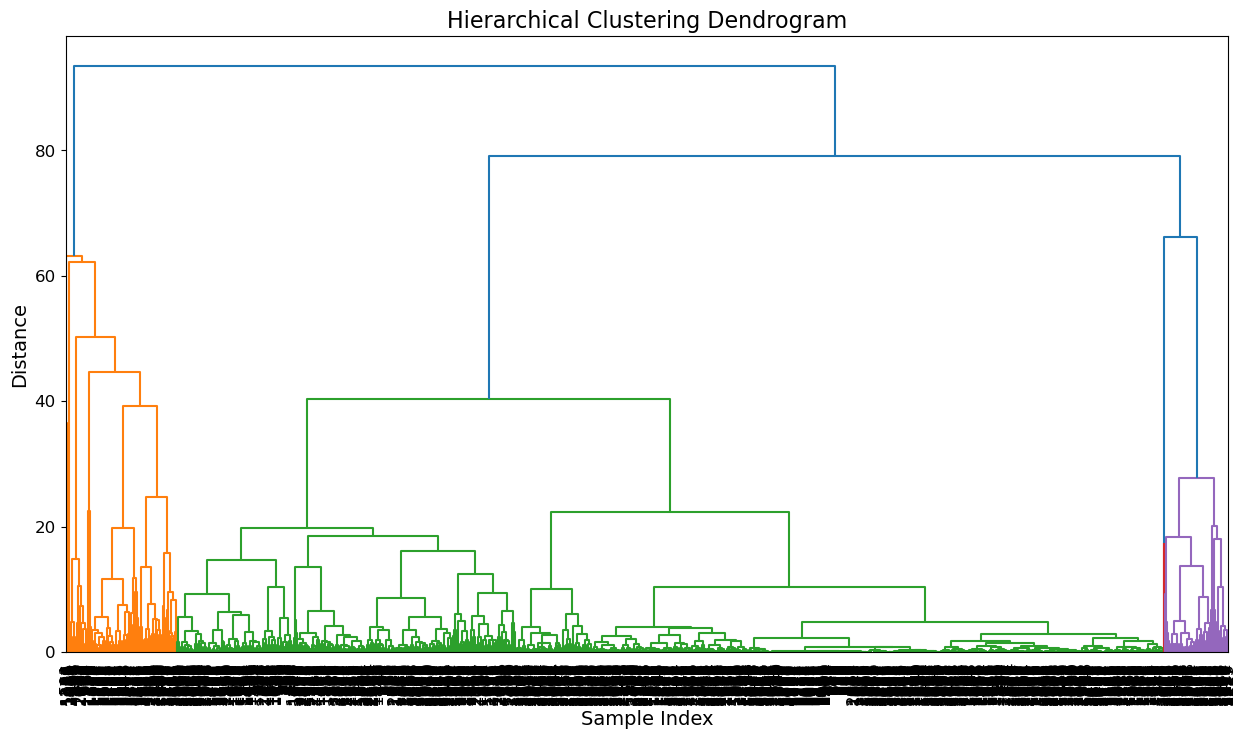

In [330]:
# Hierarchical Dendrogram
X4 = df1_scaled.copy()

mineral_features = [
    "Sodium", "Calcium", "Copper", "Iron", "Magnesium",
    "Manganese", "Phosphorus", "Potassium", "Selenium", "Zinc"
]

x4 = X4[mineral_features]
data4 = pd.DataFrame(X4, columns= x4.columns)

# Plot dendrogram
plot_dendrogram(data4)

In [331]:
# Compute hierarchical clustering linkage matrix
Z = sch.linkage(x4, method='ward')  # Using Ward’s method

# Determine the number of clusters based on dendrogram colors (visual observation)
num_clusters = 4 

# Extract cluster labels based on dendrogram colors
cluster_labels = sch.fcluster(Z, t=num_clusters, criterion="maxclust")


X4["Cluster"] = cluster_labels
print(X4["Cluster"].value_counts())

Cluster
2    2033
1     229
4     130
3       3
Name: count, dtype: int64


In [333]:
x4 = X4[[
     "Sodium", "Calcium", "Copper", "Iron", "Magnesium",
    "Manganese", "Phosphorus", "Potassium", "Selenium", "Zinc", "Cluster"]]

In [341]:
X4[X4['Cluster'] == 3][['food', 'Cluster']]

,food,Cluster
1023,dill weed dried,3
1056,oregano dried,3
1068,thyme dried,3


In [343]:
cluster_summary = x4.groupby('Cluster').mean()
print(cluster_summary.T)

Cluster            1         2          3         4
Sodium      0.297156 -0.029468  -0.196157 -0.058094
Calcium     1.488998 -0.138381  -0.442425 -0.448655
Copper     -0.120234 -0.091274  24.999617  1.062263
Iron        1.398596 -0.139126  -0.230204 -0.282653
Magnesium   1.824080 -0.178011   0.490920 -0.440701
Manganese  -0.199918 -0.171339  14.681086  2.692847
Phosphorus  1.935221 -0.187538  -0.452006 -0.465734
Potassium   1.704039 -0.184200  -0.011029 -0.120876
Selenium   -0.261914 -0.185480   8.743000  3.160227
Zinc        1.707071 -0.172103  -0.314636 -0.308390


In [345]:
# Find the cluster with the highest value for each feature
highest_cluster_per_feature = cluster_summary.idxmax(axis=0)
highest_cluster_df = pd.DataFrame({'Feature': cluster_summary.columns, 'Highest Cluster': highest_cluster_per_feature.values})

print(highest_cluster_df)

      Feature  Highest Cluster
0      Sodium                1
1     Calcium                1
2      Copper                3
3        Iron                1
4   Magnesium                1
5   Manganese                3
6  Phosphorus                1
7   Potassium                1
8    Selenium                3
9        Zinc                1


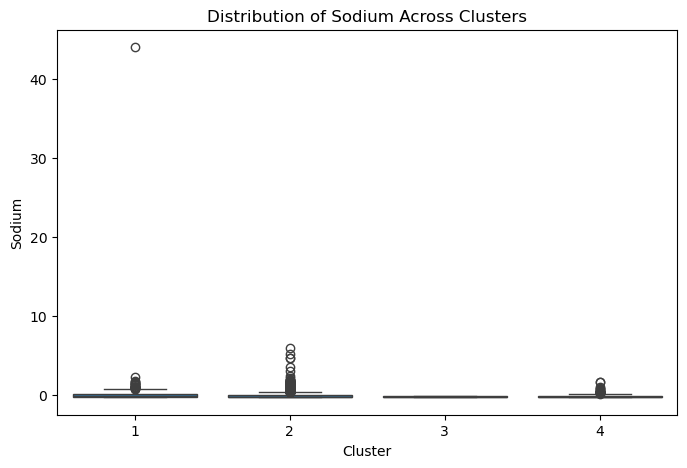

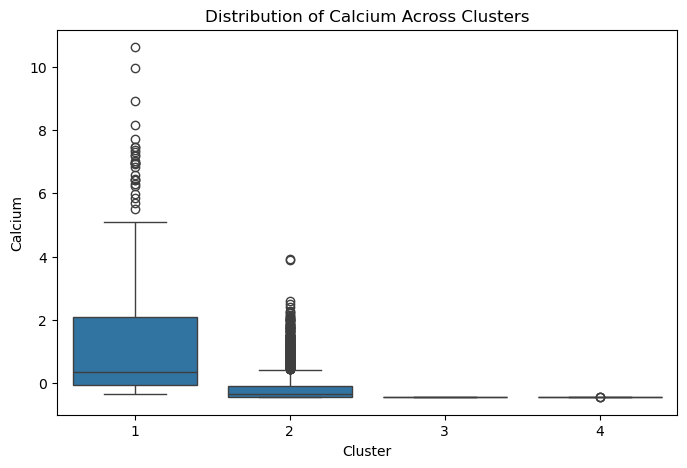

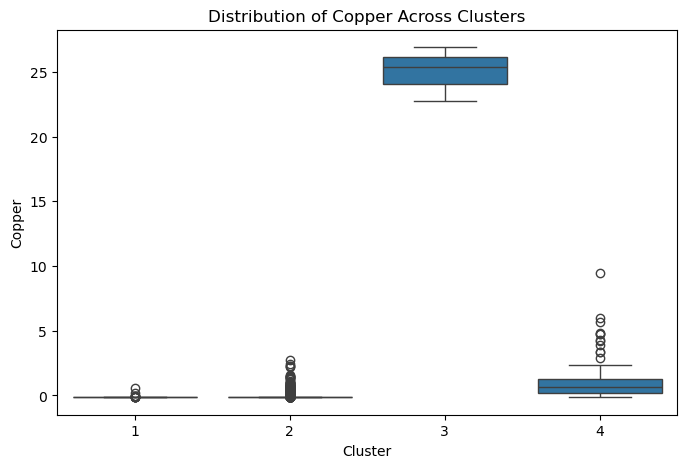

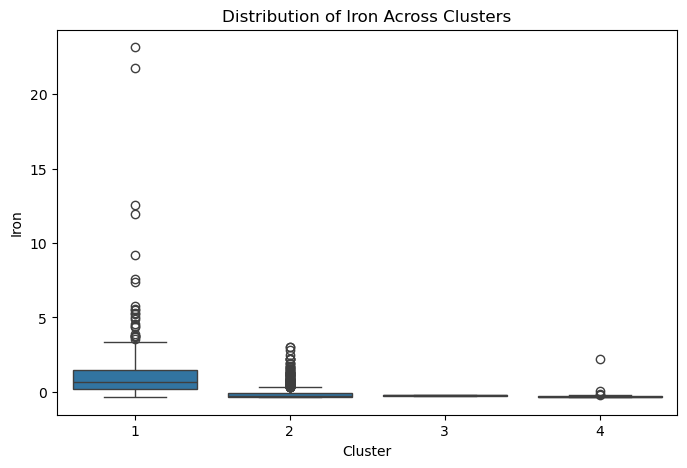

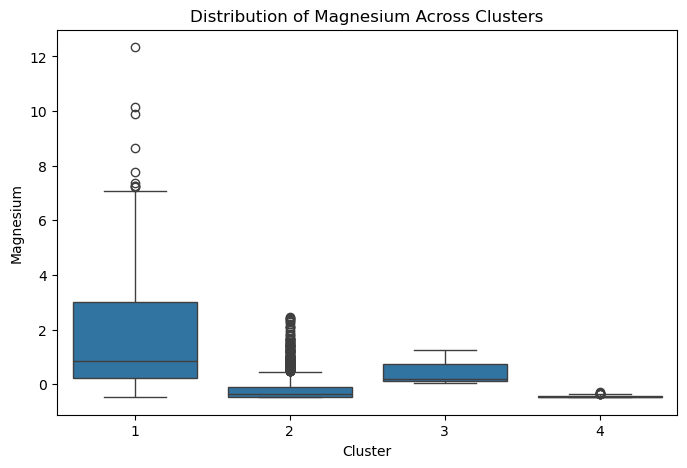

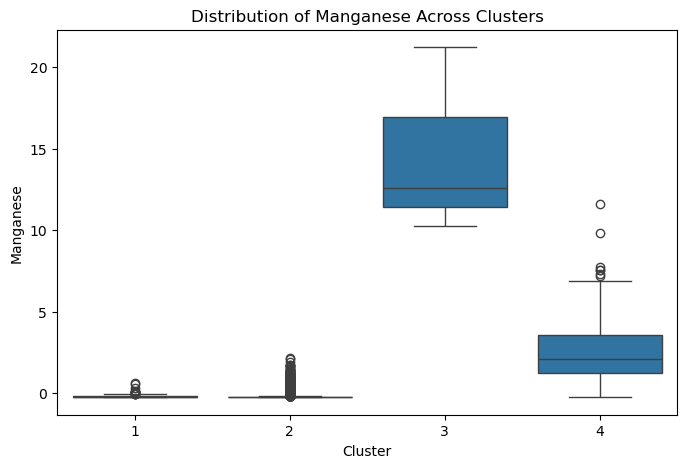

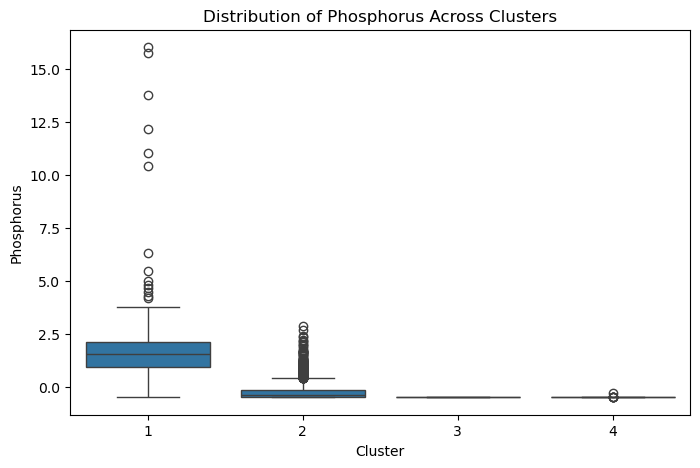

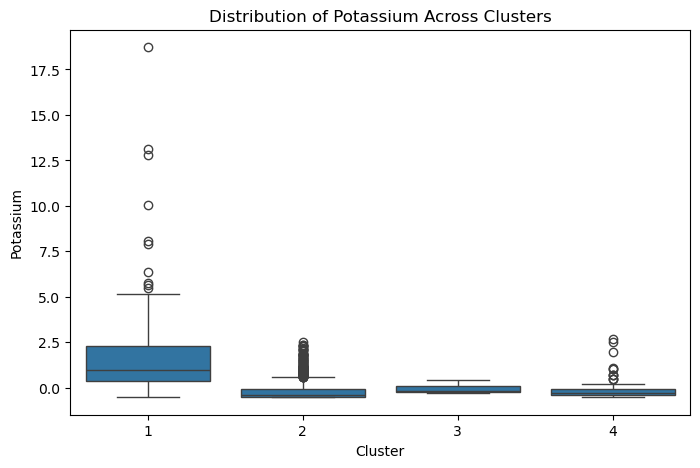

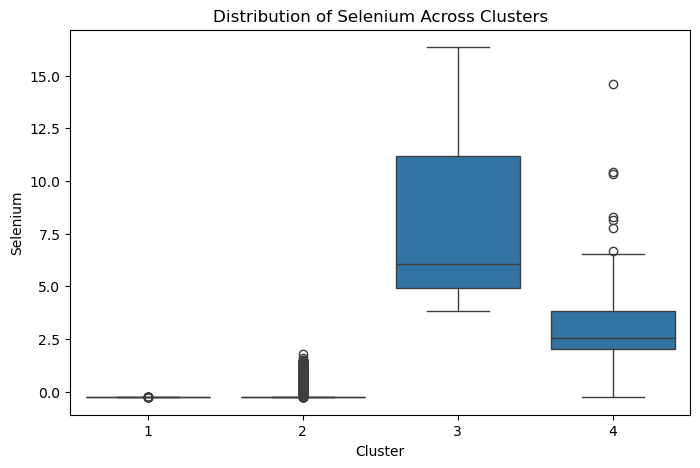

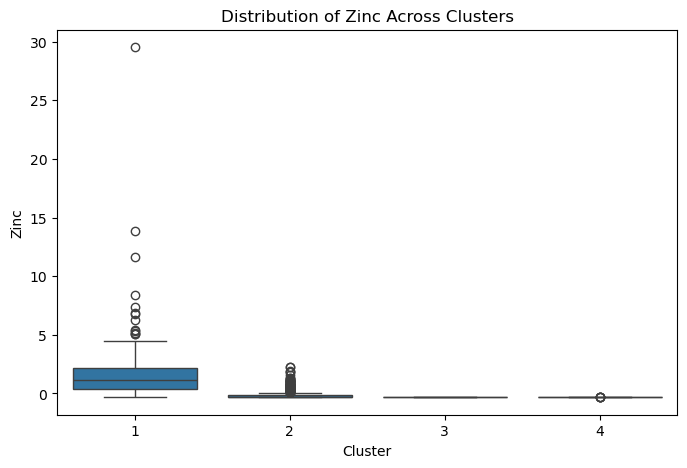

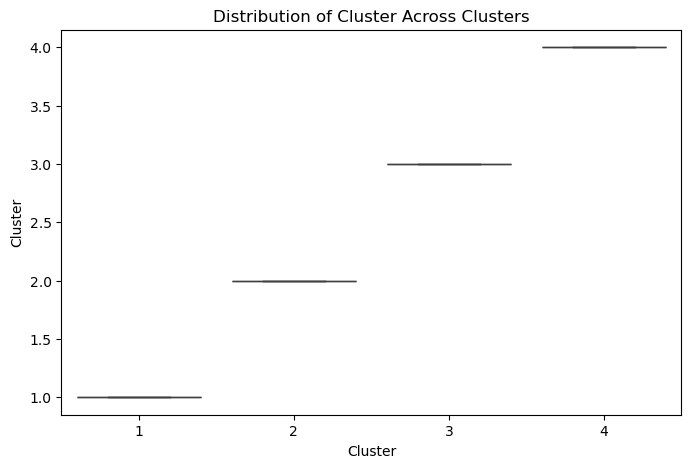

In [349]:
# visualize all numerical features
features_to_plot = x4.columns

# Boxplot 
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X4['Cluster'], y=X4[feature])
    plt.title(f"Distribution of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

- Cluster 1	High in Sodium, Calcium, Iron, Magnesium, Phosphorus, Potassium, Zinc
- Cluster 2	No significant highs (baseline group)
- Cluster 3	Extremely high in Copper, Manganese, Selenium
- Cluster 4	High in Manganese, Selenium, Copper (but lower than Cluster 3)

In [351]:
# Sample food within each clusterig
for cluster_num in X4['Cluster'].unique():
    cluster_foods = X4[X4['Cluster'] == cluster_num]
    print(f"\nTop foods in Cluster {cluster_num}:")
    print(cluster_foods[['food']].head(5)) 


Top foods in Cluster 2:
                               food
0                      cream cheese
1                 neufchatel cheese
2  requeijao cremoso light catupiry
3                    ricotta cheese
4              cream cheese low fat

Top foods in Cluster 1:
                            food
11             port salut cheese
17                gjetost cheese
21                asadero cheese
23  provolone cheese reduced fat
24              roquefort cheese

Top foods in Cluster 4:
                        food
71     enchilada with cheese
98   french fries deep fried
103          chili con carne
124         chicken sandwich
143              baked beans

Top foods in Cluster 3:
                 food
1023  dill weed dried
1056    oregano dried
1068      thyme dried


#### `Macronutrient` Clustering

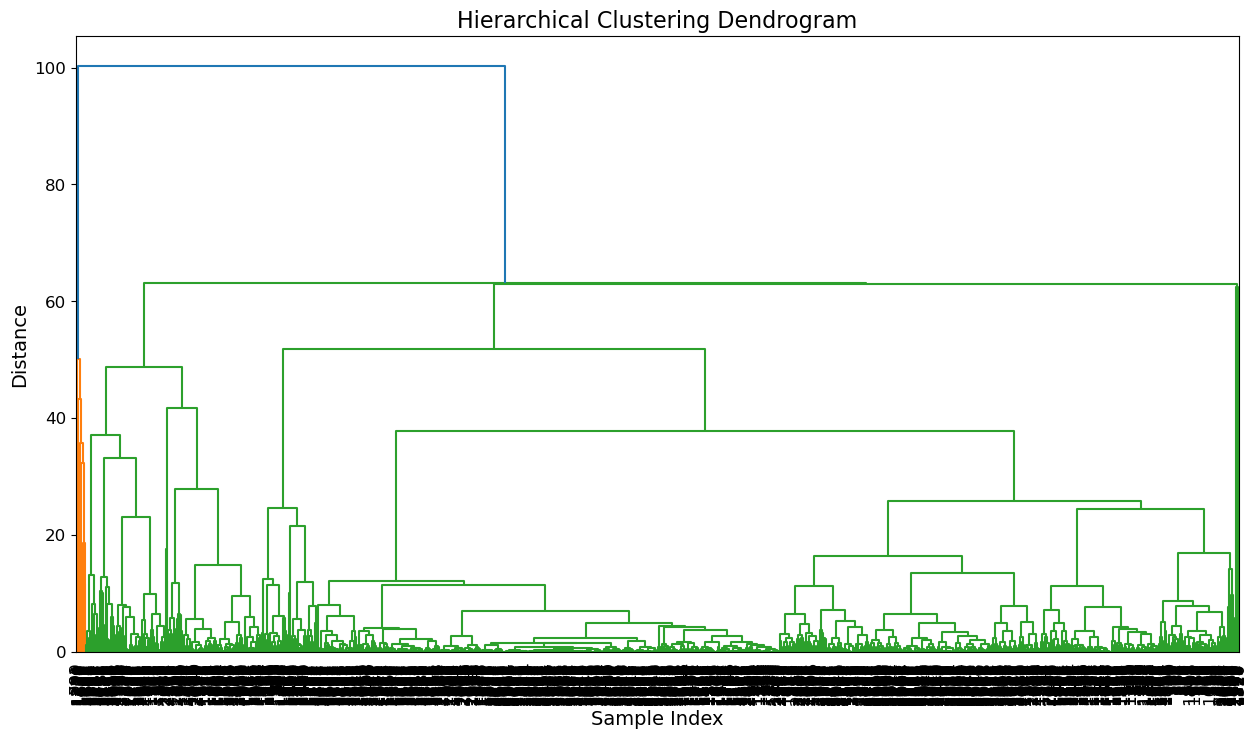

In [363]:
# Hierarchical Dendrogram
X5 = df1_scaled.copy()

selected_features = [
    "Fat", "Saturated Fats", "Monounsaturated Fats", "Polyunsaturated Fats",
    "Carbohydrates", "Sugars", "Protein", "Dietary Fiber",
    "Cholesterol", "Sodium", "Water"
]


x5 = X5[selected_features]

data5 = pd.DataFrame(X5, columns= x5.columns)

# Plot dendrogram
plot_dendrogram(data5)

In [365]:
# Cut the Hierarchical Tree to get clustering labels
data = pd.DataFrame(X5, columns=x5.columns)  
food_names = X5['food']  

# Get cluster labels
labels = hierarchical_clustering_with_cut(data, distance_threshold=45)

# Create a DataFrame to display results
clustered_foods = pd.DataFrame({'food': food_names, 'Cluster': labels})
print(clustered_foods.sort_values(by="Cluster"))

clustered_foods['Cluster'].value_counts()

                       food  Cluster
999   coconut whole coconut        1
781       weetabix weetabix        1
1676      menhaden fish oil        2
1438  turkey breast roasted        2
1721         tomatoseed oil        2
...                     ...      ...
1294      veal brain cooked        7
1320      pork brain cooked        7
1323      lamb brain cooked        7
1299      beef brain cooked        7
1943           adobo fresco        8

[2395 rows x 2 columns]


Cluster
6    1893
4     198
3     165
5     114
2      18
7       4
1       2
8       1
Name: count, dtype: int64

In [367]:
# Merge back to the original dataset - food name + corresponding clustering
X5 = pd.merge(X5, clustered_foods, on = 'food', how = 'left')
x5 = X5[[
    "Fat", "Saturated Fats", "Monounsaturated Fats", "Polyunsaturated Fats",
    "Carbohydrates", "Sugars", "Protein", "Dietary Fiber",
    "Cholesterol", "Sodium", "Water", "Cluster"
]]

In [371]:
# Check the clustering with few foods
clustered_foods[X5['Cluster'].isin([7, 8, 1])]

,food,Cluster
781,weetabix weetabix,1
999,coconut whole coconut,1
1294,veal brain cooked,7
1299,beef brain cooked,7
1320,pork brain cooked,7
1323,lamb brain cooked,7
1943,adobo fresco,8


In [373]:
# Group data by clusters and calculate mean values
cluster_summary = x5.groupby('Cluster').mean()
print(cluster_summary.T)


# Find the cluster with the highest value for each feature
highest_cluster_per_feature = cluster_summary.idxmax(axis=0)
highest_cluster_df = pd.DataFrame({'Feature': cluster_summary.columns, 'Highest Cluster': highest_cluster_per_feature.values})

print(highest_cluster_df)


# Find Which Cluster Has the Highest Value for Each Feature (Only for Clusters with More Than 1 Element)
valid_clusters = clustered_foods['Cluster'].value_counts()
valid_clusters = valid_clusters[valid_clusters > 1].index  # Clusters with count > 1

filtered_cluster_summary = cluster_summary.loc[valid_clusters]
highest_valid_cluster_per_feature = filtered_cluster_summary.idxmax(axis=0)
highest_valid_cluster_df = pd.DataFrame({'Feature': filtered_cluster_summary.columns, 'Highest Cluster': highest_valid_cluster_per_feature.values})

print(highest_valid_cluster_df)

Cluster                       1         2         3         4         5  \
Fat                    1.080022  8.086803  0.123673 -0.111899  1.270687   
Saturated Fats        27.188425  3.905922 -0.079231 -0.094992  0.795872   
Monounsaturated Fats   4.198567  7.575646  0.087865 -0.111296  1.083104   
Polyunsaturated Fats   3.715880  7.177873  0.598638 -0.095889  0.334554   
Carbohydrates         -0.632280 -0.626611  2.051949  0.865829 -0.598747   
Sugars                -0.334214 -0.334214  0.053959  2.189572 -0.317837   
Protein               -0.415045  6.440548  0.200316 -0.316571  2.035960   
Dietary Fiber         -0.413778 -0.413778  2.395027 -0.058120 -0.355822   
Cholesterol           -0.161371  2.092604 -0.151481 -0.129265  0.822234   
Sodium                -0.263368  0.441803  0.021928 -0.115096 -0.000584   
Water                 -0.715775  5.011307 -0.332597  0.259992  1.310433   

Cluster                      6          7          8  
Fat                  -0.156715   1.026579   

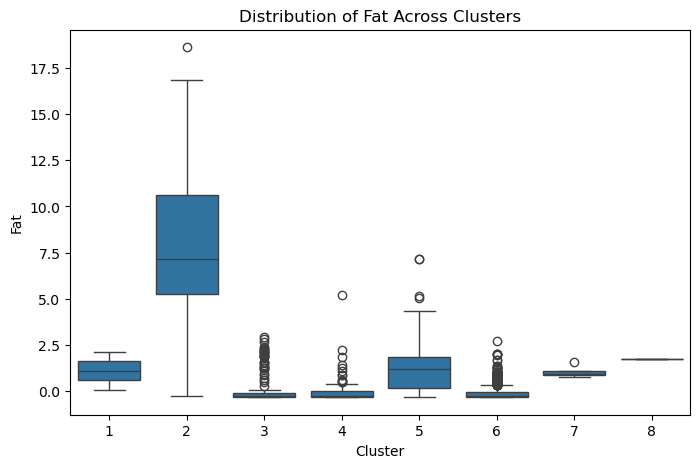

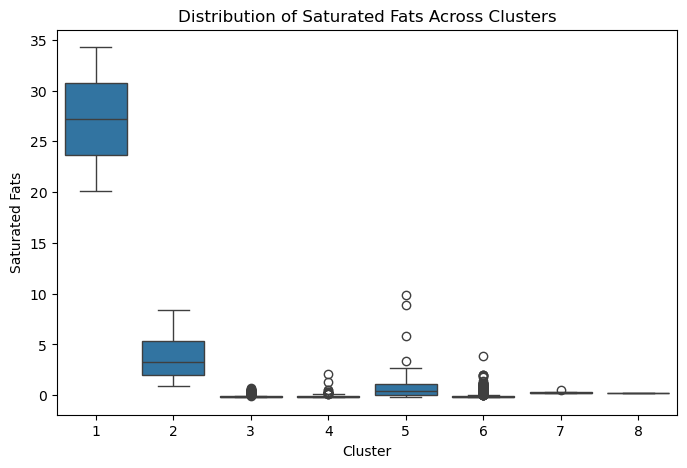

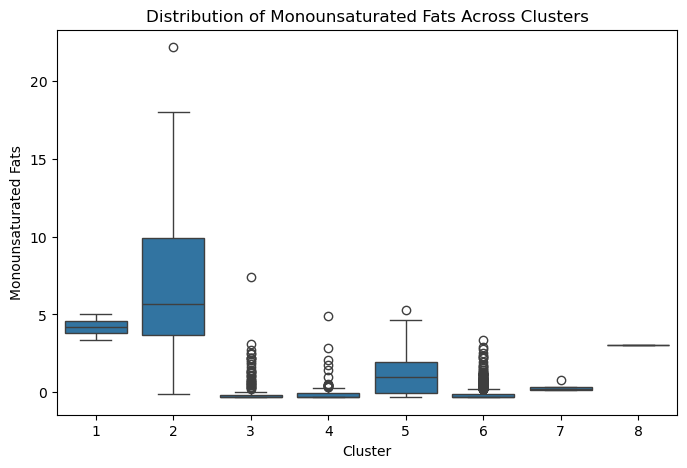

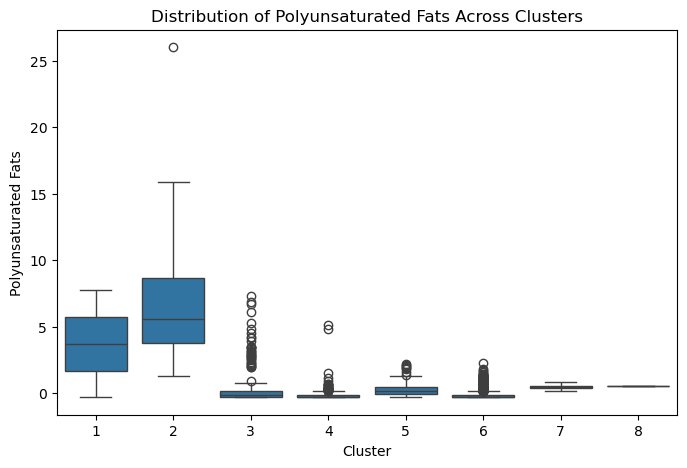

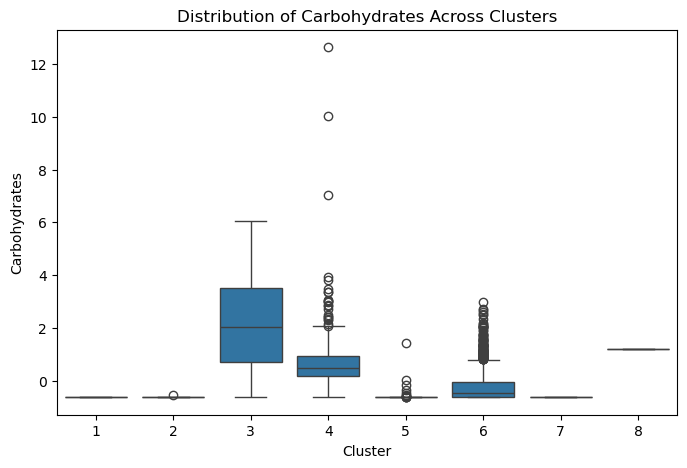

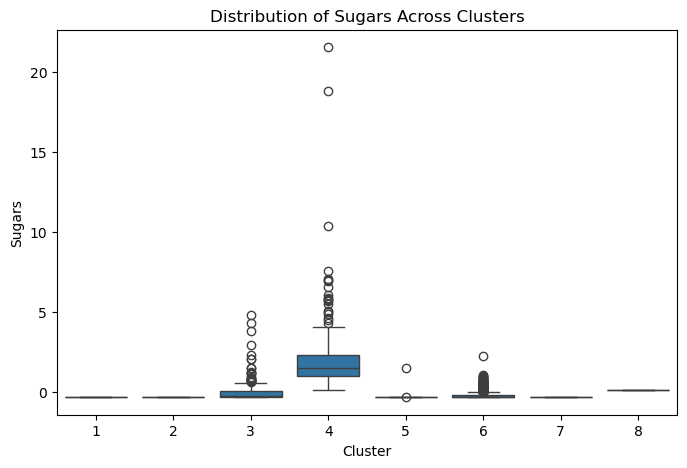

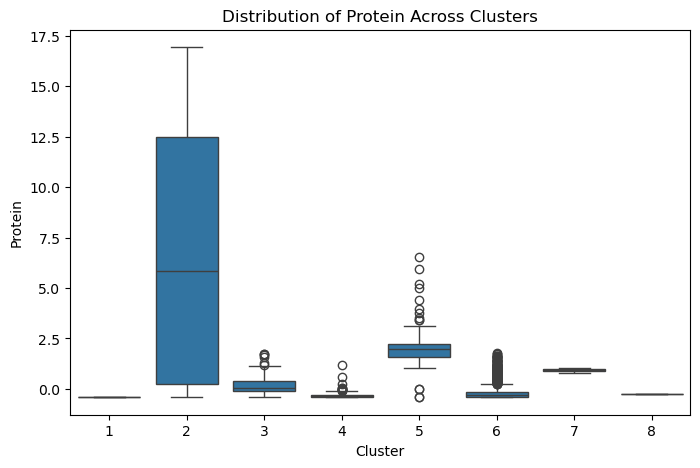

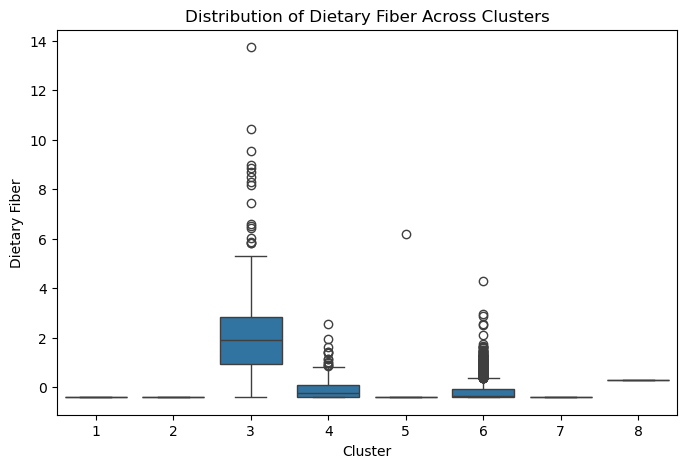

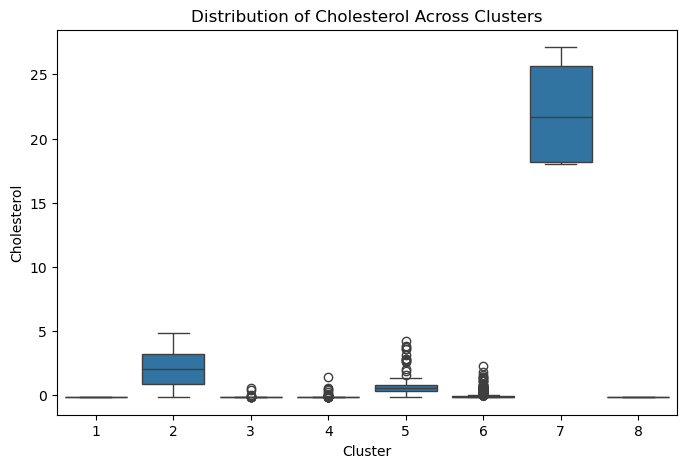

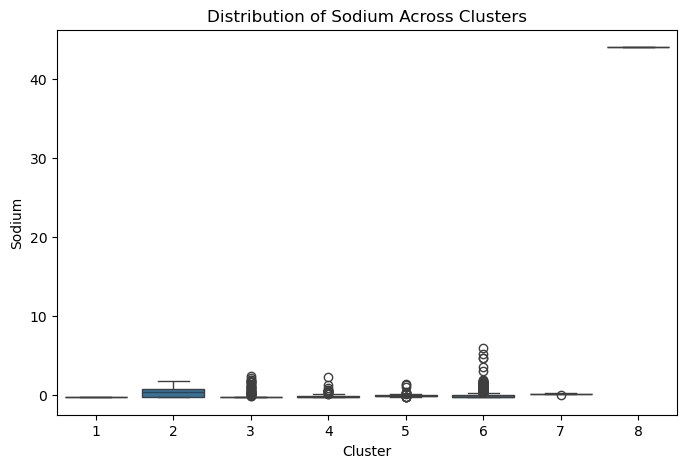

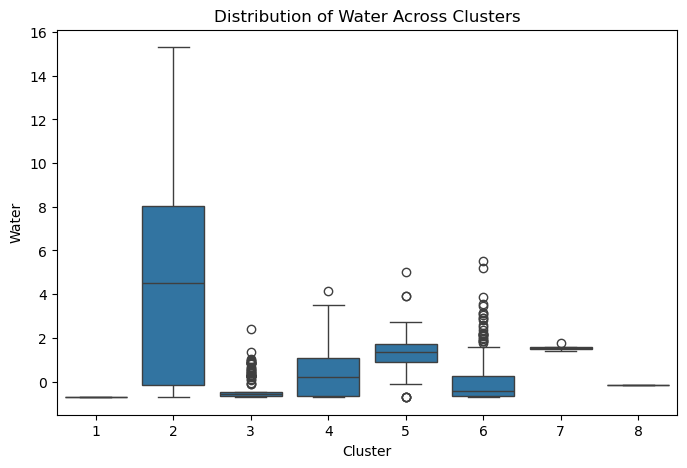

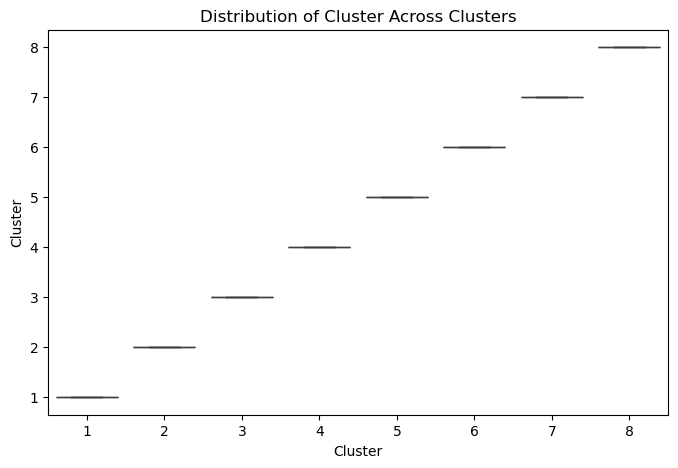

In [375]:
# visualize all numerical features
features_to_plot = x5.columns

# Boxplot 
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X5['Cluster'], y=X5[feature])
    plt.title(f"Distribution of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

- Cluster 1	High in Saturated Fats
- Cluster 2	High in Fat, Monounsaturated Fats, Polyunsaturated Fats, Protein, Water, Sodium
- Cluster 3	High in Carbohydrates, Dietary Fiber
- Cluster 4	High in Sugars
- Cluster 7	High in Cholesterol
- Cluster 8	High in Sodium

In [377]:
# Sample food within each clusterig
for cluster_num in X5['Cluster'].unique():
    cluster_foods = X5[X5['Cluster'] == cluster_num]
    print(f"\nTop foods in Cluster {cluster_num}:")
    print(cluster_foods[['food']].head(5)) 


Top foods in Cluster 6:
                               food
0                      cream cheese
1                 neufchatel cheese
2  requeijao cremoso light catupiry
3                    ricotta cheese
4              cream cheese low fat

Top foods in Cluster 4:
                              food
40                           honey
59                butter croissant
128               cheese croissant
141  pulled pork in barbecue sauce
159                arroz con leche

Top foods in Cluster 3:
                     food
83          lemon chicken
153  general tsos chicken
193       black bean soup
196        green pea soup
210       chili beef soup

Top foods in Cluster 5:
                     food
345     northern pike raw
348        pollock cooked
361  skipjack tuna cooked
362         salmon cooked
363    chum salmon cooked

Top foods in Cluster 1:
                      food
781      weetabix weetabix
999  coconut whole coconut

Top foods in Cluster 2:
                             fo